#I) Loading the Data

##Initial Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# # Hack to increase RAM for free to 32GB
# !free -h
# !nvidia-smi -L
# !nvidia-smi
# !nvcc --version
# !lscpu |grep 'Model name'
# !lscpu |grep 'Core(s) per socket:'
# !lscpu |grep 'Thread(s) per core'

In [ ]:
# Hack to make other Keras backbones work
from google.colab import output
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

tf.__version__ is 2.2.0
tf.keras.__version__ is: 2.3.0-tf


Using TensorFlow backend.


In [ ]:
# pip install tf-nightly # Added to avoid error when saving covid_MobileNetV3 model. Taken from: https://colab.research.google.com/gist/jvishnuvardhan/15f06ff402a678a77d0c47592a290701/32672.ipynb


##CC-CCII dataset
http://ncov-ai.big.ac.cn/download?lang=en


In [ ]:
# !unzip /content/drive/"My Drive"/thesis_dataset/CCCCII_Data.zip

#!unzip /content/drive/"My Drive"/thesis_dataset/Normal_four.zip


# !unzip /content/drive/"My Drive"/thesis_dataset/CP-32.zip
# !unzip /content/drive/"My Drive"/thesis_dataset/COVID19-3.zip
!unzip /content/drive/"My Drive"/thesis_dataset/Normal-24.zip


Archive:  /content/drive/My Drive/thesis_dataset/Normal-24.zip
   creating: Normal/2637/
   creating: Normal/2637/147/
  inflating: Normal/2637/147/0007.jpg  
  inflating: Normal/2637/147/0016.jpg  
  inflating: Normal/2637/147/0004.jpg  
  inflating: Normal/2637/147/0000.jpg  
  inflating: Normal/2637/147/0024.jpg  
  inflating: Normal/2637/147/0009.jpg  
  inflating: Normal/2637/147/0027.jpg  
  inflating: Normal/2637/147/0023.jpg  
  inflating: Normal/2637/147/0028.jpg  
  inflating: Normal/2637/147/0008.jpg  
  inflating: Normal/2637/147/0003.jpg  
  inflating: Normal/2637/147/0001.jpg  
  inflating: Normal/2637/147/0020.jpg  
  inflating: Normal/2637/147/0019.jpg  
  inflating: Normal/2637/147/0014.jpg  
  inflating: Normal/2637/147/0015.jpg  
  inflating: Normal/2637/147/0005.jpg  
  inflating: Normal/2637/147/0026.jpg  
  inflating: Normal/2637/147/0022.jpg  
  inflating: Normal/2637/147/0021.jpg  
  inflating: Normal/2637/147/0031.jpg  
  inflating: Normal/2637/147/0030.jpg  
 

##Image Segmentation##

We do this **once** and then save the segmented dataset. We then use that to train our models.

1.   **Code Source:** https://github.com/JoHof/lungmask
2.   **Example:** https://keras.io/examples/vision/oxford_pets_image_segmentation/





In [ ]:
# Installation of package providing trained U-net models for lung segmentation

# !pip install git+https://github.com/JoHof/lungmask # Important to have the "!" infront

In [1]:
# from lungmask import mask
# import SimpleITK as sitk

# import os
# import skimage
# import numpy as np


# # # input_image = sitk.ReadImage(INPUT)

# # # input_image = sitk.ReadImage(img_data)
# # # model = mask.get_model('unet','R231CovidWeb') 
# # # segmentation = mask.apply(input_image, model)

# # # segmentation = mask.apply(input_image)  # default model is U-net(R231) - Change this to the COVIDWeb Model

# # # New code for image segmentation




# %pylab inline
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import pdb



# img_1 = 'NCP/1290/2731/0029.png'
# img_2 = 'NCP/1290/2731/0030.png'

# input_image_1 = sitk.ReadImage(img_1)
# input_image_2 = sitk.ReadImage(img_2)

# # input_image_1 = sitk.GetArrayFromImage(input_image_1)
# # input_image_2 = sitk.GetArrayFromImage(input_image_2)

# input_image_1 = np.expand_dims(input_image_1, 0)
# input_image_2 = np.expand_dims(input_image_2, 0)

# Stacked = np.concatenate((input_image_1, input_image_2), axis=0)


# model = mask.get_model('unet','R231CovidWeb')

# segmentation = mask.apply(Stacked, model, noHU=True)

# print(Stacked)
# print(Stacked.shape)
# pdb.set_trace()


# # for folders, _, filenames in os.walk('/content/drive/My Drive/thesis_dataset'):
# #   for img_data in filenames:
# #     if 'png' in img_data:



      

# #       input_image = sitk.ReadImage(os.path.join(folders, img_data))
# #       # raw_img = sitk.GetArrayFromImage(input_image)
# #       raw_img = input_image



      
# #       # support for non HU images. This is just a hack. The models were not trained with this in mind
      
# #       # pdb.set_trace()
# #       tvolslices = np.expand_dims(raw_img, 0)
# #       # tvolslices = skimage.color.rgb2gray(raw_img)
# #       # # tvolslices = skimage.transform.resize(tvolslices, [256, 256])
      
# #       # Rescaling
# #       # tvolslices = np.asarray([tvolslices*x for x in np.linspace(0.3,2,20)])
# #       # tvolslices[tvolslices>1] = 1

# #       # sanity = [(tvolslices[x]>0.6).sum()>25000 for x in range(len(tvolslices))]
# #       # print(sanity)

# #       # tvolslices = tvolslices[sanity]
# #       print(tvolslices[0].shape)
# #       model = mask.get_model('unet','R231CovidWeb')
      
# #       segmentation = mask.apply(input_image, model, noHU=False)
      
# #       data_path = os.path.join(folders, 'segmented_' + img_data)
# #       sitk.imsave(data_path, segmentation)



# # # # Path to folder to save images

# # # # Do segmentation first, saved the segmented images into the folders! it will make it easier.

# # # # No need to map images back to HU here      
# # # # The images you downloaded from CC-CCII are not encoded in Hu. (Only CT volumes in Niffty files are encoded in Hu). Need to enable —noHu. 
# # # # Could you try create a loop to process the images one by one? It may be inefficient but at least you could try and see the segmented results. You could try on few subjects’ collection first.  

##Visualising a slice

Populating the interactive namespace from numpy and matplotlib
Here is a picture of: Normal/2666/176/0014.jpg


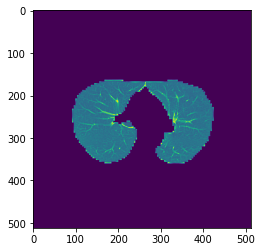

In [ ]:
# # img_data = ['CP/2464/3228/0059.png'] 
img_data = 'Normal/2666/176/0014.jpg'
# #img_data = 'NCP/138/1420/0072.png'





%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#img=mpimg.imread('your_image.png')
img=mpimg.imread(img_data)
imgplot = plt.imshow(img)
print('Here is a picture of:',img_data)
plt.show()

##Kaggle X-ray Data (To use later to "show" the resilience of our algorithms)

In [ ]:
# Data source: https://www.kaggle.com/tawsifurrahman/covid19-radiography-database
# Useful code: https://www.kaggle.com/yichengchen2020/radiography-classification-with-various-models

# !unzip /content/drive/"My Drive"/thesis_dataset/Kaggle_images.zip

# output.clear()

#II) Defining the Models

## Models a) and b) from Itse & al. (2018)



Pooling functions needed for models a) and b)


***Source:*** https://github.com/yanyongluan/MINNs/blob/f816645f5d7bbc9366b95fc967f775426fc081c1/mil_nets/pooling_method.py



In [ ]:
from keras import backend as K

def max_pooling(x):
    """Max Pooling to obtain aggregation.
    Parameters
    ---------------------
    x : Tensor (N x d)
        Input data to do max-pooling,
        where N is number of instances in one bag,
        and d is dimension of instance feature
        (when d = 1, x means instance scores; when d > 1, x means instance representations).
    Return
    ---------------------
    output : Tensor (1 x d)
        Output of max-pooling,
        where d is dimension of instance feature
        (when d = 1, the output means bag score; when d > 1, the output means bag representation).
    """
    output = K.max(x, axis=0, keepdims=True)
    return output

def mean_pooling(x):
    """Mean Pooling to obtain aggregation.
    Parameters
    ---------------------
    x : Tensor (N x d)
        Input data to do mean-pooling,
        where N is number of instances in one bag,
        and d is dimension of instance feature
        (when d = 1, x means instance scores; when d > 1, x means instance representations).
    Return
    ---------------------
    output : Tensor (1 x d)
        Output of mean-pooling,
        where d is dimension of instance feature
        (when d = 1, the output means bag score; when d > 1, the output means bag representation).
    """
    output = K.mean(x, axis=0, keepdims=True)
    return output

def LSE_pooling(x):
    """LSE Pooling to obtain aggregation.
    Do LSE(log-sum-exp) pooling, like LSE(x1, x2, x3) = log(exp(x1)+exp(x2)+exp(x3)).
    Parameters
    ---------------------
    x : Tensor (N x d)
        Input data to do LSE-pooling,
        where N is number of instances in one bag,
        and d is dimension of instance feature
        (when d = 1, x means instance scores; when d > 1, x means instance representations).
    Return
    ---------------------
    output : Tensor (1 x d)
        Output of LSE-pooling,
        where d is dimension of instance feature
        (when d = 1, the output means bag score; when d > 1, the output means bag representation).
    """
    output = K.log(K.mean(K.exp(x), axis=0, keepdims=True))
    return output

def choice_pooling(x, pooling_mode):
    """Choice the pooling mode
    Parameters
    -------------------
    x : Tensor (N x d)
        Input data to do MIL-pooling,
        where N is number of instances in one bag,
        and d is dimension of instance feature
        (when d = 1, x means instance scores; when d > 1, x means instance representations).
    pooling_mode : string
        Choice the pooling mode for MIL pooling.
    Return
    --------------------
    output : Tensor (1 x d)
            Output of MIL-pooling,
            where d is dimension of instance feature
            (when d = 1, the output means bag score; when d > 1, the output means bag representation).
    """
    if pooling_mode == 'max':
        return max_pooling(x)
    if pooling_mode == 'lse':
        return LSE_pooling(x)
    if pooling_mode == 'ave':
        return mean_pooling(x)


Classes imported for Models a) and b)

In [ ]:
from keras.layers import Layer
from keras import backend as K
from keras import activations, initializers, regularizers
#from . import pooling_method as pooling



class Score_pooling(Layer): # For model a). Source: https://github.com/yanyongluan/MINNs/blob/f816645f5d7bbc9366b95fc967f775426fc081c1/mil_nets/layer.py#L45
    """
    Score pooling layer
    This layer contains a FC layer which only has one neural with sigmoid actiavtion
    and MIL pooling. The input of this layer is instance features. Then we obtain
    instance scores via this FC layer. And use MIL pooling to aggregate instance scores
    into bag score that is the output of Score pooling layer.
    This layer is used in mi-Net.
    # Arguments
        output_dim: Positive integer, dimensionality of the output space
        kernel_initializer: Initializer of the `kernel` weights matrix
        bias_initializer: Initializer of the `bias` weights
        kernel_regularizer: Regularizer function applied to the `kernel` weights matrix
        bias_regularizer: Regularizer function applied to the `bias` weights
        use_bias: Boolean, whether use bias or not
        pooling_mode: A string,
                      the mode of MIL pooling method, like 'max' (max pooling),
                      'ave' (average pooling), 'lse' (log-sum-exp pooling)
    # Input shape
        2D tensor with shape: (batch_size, input_dim)
    # Output shape
        2D tensor with shape: (1, units)
    """
    def __init__(self, output_dim, kernel_initializer='glorot_uniform', bias_initializer='zeros',
                    kernel_regularizer=None, bias_regularizer=None,
                    use_bias=True, pooling_mode='max', **kwargs):
        self.output_dim = output_dim
        self.pooling_mode = pooling_mode

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.use_bias = use_bias
        super(Score_pooling, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]

        self.kernel = self.add_weight(shape=(input_dim, self.output_dim),
                                        initializer=self.kernel_initializer,
                                        name='kernel',
                                        regularizer=self.kernel_regularizer)

        if self.use_bias:
            self.bias = self.add_weight(shape=(self.output_dim,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer)
        else:
            self.bias = None

        self.input_built = True

    def call(self, x, mask=None):
        n, d = x.shape

        # compute instance-level score
        x = K.dot(x, self.kernel)
        if self.use_bias:
            x = K.bias_add(x, self.bias)

        # sigmoid
        x = K.sigmoid(x)

        # do-pooling operator
        output = choice_pooling(x, self.pooling_mode)

        return output

    def compute_output_shape(self, input_shape):
        shape = list(input_shape)
        assert len(shape) == 2
        shape[1] = self.output_dim
        return tuple(shape)

    def get_config(self):
        config = {
            'output_dim': self.output_dim,
            'kernel_initializer': initializers.serialize(self.kernel.initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'use_bias': self.use_bias,
            'pooling_mode': self.pooling_mode
        }
        base_config = super(Score_pooling, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))






class Feature_pooling(Layer): # For model b). Source: https://github.com/yanyongluan/MINNs/blob/f816645f5d7bbc9366b95fc967f775426fc081c1/mil_nets/layer.py#L45
    """
    Feature pooling layer
    This layer contains a MIL pooling and a FC layer which only has one neural with
    sigmoid activation. The input of this layer is instance features. Via MIL pooling,
    we aggregate instance features to bag features. Finally, we obtain bag score by
    this FC layer with only one neural and sigmoid activation
    This layer is used in MI-Net and MI-Net with DS.
    # Arguments
        output_dim: Positive integer, dimensionality of the output space
        kernel_initializer: Initializer of the `kernel` weights matrix
        bias_initializer: Initializer of the `bias` weights
        kernel_regularizer: Regularizer function applied to the `kernel` weights matrix
        bias_regularizer: Regularizer function applied to the `bias` weights
        use_bias: Boolean, whether use bias or not
        pooling_mode: A string,
                      the mode of MIL pooling method, like 'max' (max pooling),
                      'ave' (average pooling), 'lse' (log-sum-exp pooling)
    # Input shape
        2D tensor with shape: (batch_size, input_dim)
    # Output shape
        2D tensor with shape: (1, units)
    """
    def __init__(self, output_dim, kernel_initializer='glorot_uniform', bias_initializer='zeros',
                    kernel_regularizer=None, bias_regularizer=None,
                    use_bias=True, pooling_mode='max', **kwargs):
        self.output_dim = output_dim
        self.pooling_mode = pooling_mode

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.use_bias = use_bias
        super(Feature_pooling, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]

        self.kernel = self.add_weight(shape=(input_dim, self.output_dim),
                                        initializer=self.kernel_initializer,
                                        name='kernel',
                                        regularizer=self.kernel_regularizer,
                                        trainable=True)

        if self.use_bias:
            self.bias = self.add_weight(shape=(self.output_dim,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        trainable=True)
        else:
            self.bias = None

        self.input_built = True

    def call(self, x, mask=None):
        n, d = x.shape

        # do-pooling operator
        x = choice_pooling(x, self.pooling_mode)

        # compute bag-level score
        output = K.dot(x, self.kernel)
        if self.use_bias:
            output = K.bias_add(output, self.bias)

        # sigmoid
        output = K.sigmoid(output)

        return output

    def compute_output_shape(self, input_shape):
        shape = list(input_shape)
        assert len(shape) == 2
        shape[1] = self.output_dim
        return tuple(shape)

    def get_config(self):
        config = {
            'output_dim': self.output_dim,
            'kernel_initializer': initializers.serialize(self.kernel.initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'use_bias': self.use_bias,
            'pooling_mode': self.pooling_mode
        }
        base_config = super(Feature_pooling, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


##Loading all the relevant functions and libraries from *utl*##

https://github.com/YGOX/covid_MIL/blob/master/utl/Covid_Net.py

Covid_Net.py- build a attention based MIL model with a VGG style backbone

In [ ]:
import sys
import time
from random import shuffle
import numpy as np
import argparse
import tensorflow as tf
from keras.utils import multi_gpu_model
from keras.models import Model
from keras.optimizers import SGD,Adam
from keras.regularizers import l2
from keras.layers import Input, Activation, GlobalAveragePooling2D, BatchNormalization, Dense, Layer, Dropout, Conv2D, MaxPooling2D, Flatten, multiply
# from .metrics import bag_accuracy, bag_loss, binary_focal_loss
# from .custom_layers import Mil_Attention, Last_Sigmoid




def instance_based_net(input_dim, args, weights=None, useMulGpu=False): # Model a) in Ilse et. al (2018). Based on Mi-Net : https://github.com/yanyongluan/MINNs with added convolutional layers

    lr = args["init_lr"]
    weight_decay = args["init_lr"]
    momentum = args["momentum"]

    data_input = Input(shape=input_dim, dtype='float32', name='input')
    conv1_1 = Activation('relu')(BatchNormalization()(Conv2D(32, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(data_input)))
    conv1_2 = Activation('relu')(BatchNormalization()(Conv2D(32, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv1_1)))
    pool1 = MaxPooling2D((2,2))(conv1_2)
    conv2_1 = Activation('relu')(BatchNormalization()(Conv2D(64, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool1)))
    conv2_2 = Activation('relu')(BatchNormalization()(Conv2D(64, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv2_1)))
    pool2 = MaxPooling2D((2,2))(conv2_2)
    conv3_1 = Activation('relu')(BatchNormalization()(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool2)))
    conv3_2 = Activation('relu')(BatchNormalization()(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv3_1)))
    conv3_3 = Activation('relu')(BatchNormalization()(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv3_2)))
    pool3 = MaxPooling2D((2,2))(conv3_3)
    conv4_1 = Activation('relu')(BatchNormalization()(Conv2D(256, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool3)))
    conv4_2 = Activation('relu')(BatchNormalization()(Conv2D(256, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv4_1)))
    conv4_3 = Activation('relu')(BatchNormalization()(Conv2D(256, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv4_2)))
    pool4 = MaxPooling2D((2,2))(conv4_3)
    conv5_1 = Activation('relu')(BatchNormalization()(Conv2D(512, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool4)))
    conv5_2 = Activation('relu')(BatchNormalization()(Conv2D(512, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv5_1)))
    conv5_3 = Activation('relu')(BatchNormalization()(Conv2D(512, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv5_2)))
    embed= GlobalAveragePooling2D()(conv5_3)

    sp = Score_pooling(output_dim=1, kernel_regularizer=l2(0.0005), pooling_mode='max', name='sp')(embed) # FCN then MIL (like mi-Net)

    model = Model(inputs=[data_input], outputs=[sp])

    ## Old approach for the last few layers:

    # fcn = Last_Sigmoid(output_dim=1, name='FC1_sigmoid')(embed) # FCN 
    # fp = Feature_pooling(output_dim=1, kernel_regularizer=l2(0.0005), pooling_mode='max', name='fp')(fcn) # MIL
    # model = Model(inputs=[data_input], outputs=[fp])

    # model.summary()
    if useMulGpu == True:
        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
    else:
        model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
        parallel_model = model

    return parallel_model




def embedding_based_net(input_dim, args, weights=None, useMulGpu=False): # Model b) in Ilse et. al (2018). Based on Mi-Net : https://github.com/yanyongluan/MINNs with added convolutional layers

    lr = args["init_lr"]
    weight_decay = args["init_lr"]
    momentum = args["momentum"]

    data_input = Input(shape=input_dim, dtype='float32', name='input')
    conv1_1 = Activation('relu')(BatchNormalization()(Conv2D(32, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(data_input)))
    conv1_2 = Activation('relu')(BatchNormalization()(Conv2D(32, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv1_1)))
    pool1 = MaxPooling2D((2,2))(conv1_2)
    conv2_1 = Activation('relu')(BatchNormalization()(Conv2D(64, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool1)))
    conv2_2 = Activation('relu')(BatchNormalization()(Conv2D(64, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv2_1)))
    pool2 = MaxPooling2D((2,2))(conv2_2)
    conv3_1 = Activation('relu')(BatchNormalization()(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool2)))
    conv3_2 = Activation('relu')(BatchNormalization()(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv3_1)))
    conv3_3 = Activation('relu')(BatchNormalization()(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv3_2)))
    pool3 = MaxPooling2D((2,2))(conv3_3)
    conv4_1 = Activation('relu')(BatchNormalization()(Conv2D(256, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool3)))
    conv4_2 = Activation('relu')(BatchNormalization()(Conv2D(256, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv4_1)))
    conv4_3 = Activation('relu')(BatchNormalization()(Conv2D(256, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv4_2)))
    pool4 = MaxPooling2D((2,2))(conv4_3)
    conv5_1 = Activation('relu')(BatchNormalization()(Conv2D(512, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool4)))
    conv5_2 = Activation('relu')(BatchNormalization()(Conv2D(512, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv5_1)))
    conv5_3 = Activation('relu')(BatchNormalization()(Conv2D(512, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv5_2)))
    embed= GlobalAveragePooling2D()(conv5_3)

    fp = Feature_pooling(output_dim=1, kernel_regularizer=l2(0.0005), pooling_mode='max', name='fp')(embed) # MIL Pooling then FC (like in MI-Net)

    model = Model(inputs=[data_input], outputs=[fp])
    


    ## Old approach for the last few layers:

    # fp = Feature_pooling(output_dim=1, kernel_regularizer=l2(0.0005), pooling_mode='max', name='fp')(embed) # MIL Pooling + FC
    # out = Last_Sigmoid(output_dim=1, name='FC1_sigmoid')(fp) # FCN
    # model = Model(inputs=[data_input], outputs=[out])
    

    # model.summary()
    if useMulGpu == True:
        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
    else:
        model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
        parallel_model = model

    return parallel_model




def covid_net(input_dim, args, weights=None, useMulGpu=False): # Model c) in Ilse et. al (2018) (with attention mechanism as the MIL pooling)

    lr = args["init_lr"]
    weight_decay = args["init_lr"]
    momentum = args["momentum"]

    data_input = Input(shape=input_dim, dtype='float32', name='input')
    conv1_1 = Activation('relu')(BatchNormalization()(Conv2D(32, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(data_input)))
    conv1_2 = Activation('relu')(BatchNormalization()(Conv2D(32, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv1_1)))
    pool1 = MaxPooling2D((2,2))(conv1_2)
    conv2_1 = Activation('relu')(BatchNormalization()(Conv2D(64, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool1)))
    conv2_2 = Activation('relu')(BatchNormalization()(Conv2D(64, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv2_1)))
    pool2 = MaxPooling2D((2,2))(conv2_2)
    conv3_1 = Activation('relu')(BatchNormalization()(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool2)))
    conv3_2 = Activation('relu')(BatchNormalization()(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv3_1)))
    conv3_3 = Activation('relu')(BatchNormalization()(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv3_2)))
    pool3 = MaxPooling2D((2,2))(conv3_3)
    conv4_1 = Activation('relu')(BatchNormalization()(Conv2D(256, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool3)))
    conv4_2 = Activation('relu')(BatchNormalization()(Conv2D(256, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv4_1)))
    conv4_3 = Activation('relu')(BatchNormalization()(Conv2D(256, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv4_2)))
    pool4 = MaxPooling2D((2,2))(conv4_3)
    conv5_1 = Activation('relu')(BatchNormalization()(Conv2D(512, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool4)))
    conv5_2 = Activation('relu')(BatchNormalization()(Conv2D(512, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv5_1)))
    conv5_3 = Activation('relu')(BatchNormalization()(Conv2D(512, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv5_2)))
    embed= GlobalAveragePooling2D()(conv5_3)

  #  fp = Feature_pooling(output_dim=1, kernel_regularizer=l2(0.0005), pooling_mode='max',
#                          name='fp')(fc2)
    alpha = Mil_Attention(L_dim=128, output_dim=1, kernel_regularizer=l2(weight_decay), name='alpha', use_gated=args["useGated"])(embed) # using the defined MIL attention class here
    
    x_mul = multiply([alpha, embed], name='multiply_1')
    # x_mul = multiply([alpha, embed])

    out = Last_Sigmoid(output_dim=1, name='FC1_sigmoid')(x_mul)
    
    model = Model(inputs=[data_input], outputs=[out])





    # model.summary()
    if useMulGpu == True:
        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
    else:
        model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
        parallel_model = model

    return parallel_model


##Experimentation with other backbones for the Attention-Based Model## 

####**ResNet50**####
**Source:** code adapted from https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py

In [ ]:
#import tensorflow as tf
#from tensorflow import keras
import keras.layers
from keras.layers import ZeroPadding2D, Add, Input, Activation, AveragePooling2D, GlobalAveragePooling2D, BatchNormalization, Dense, Layer, Dropout, Conv2D, MaxPooling2D, Flatten, multiply

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from tensorflow.keras import layers # Added
from keras.layers import Layer # Added

import os
import warnings

backend = None
layers = None
models = None
keras_utils = None


def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters

    if tf.keras.backend.image_data_format() == 'channels_last': # Added tf.keras.
        bn_axis = 3
    else:
        bn_axis = 1

    # bn_axis = 3 # [HACK] manually added since the image_data_format is 'channels_last'

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
                      padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = Add()([x, input_tensor]) # changed from layers.add
    x = Activation('relu')(x)
    return x


def conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2)):
    """A block that has a conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
        strides: Strides for the first conv layer in the block.
    # Returns
        Output tensor for the block.
    Note that from stage 3,
    the first conv layer at main path is with strides=(2, 2)
    And the shortcut should have strides=(2, 2) as well
    """
    filters1, filters2, filters3 = filters

    if tf.keras.backend.image_data_format() == 'channels_last': # Added tf.keras.
        bn_axis = 3
    else:
        bn_axis = 1

    # bn_axis = 3 # [HACK] manually added since the image_data_format is 'channels_last'

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), strides=strides,
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides,
                             kernel_initializer='he_normal',
                             name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(
        axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = Add()([x, shortcut]) # Changed from layers.add
    x = Activation('relu')(x)
    return x


In [ ]:
# ResNet50
#import tensorflow.keras

# (ResNet is simplified version of Densenet - densenet works very well for segmentation tasks but here we work on image level classification so Resnet is more helpful than DenseNet)

# https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
#from tensorflow.keras.applications.resnet import ResNet50

import tensorflow as tf
from tensorflow import keras

def covid_ResNet50(input_dim, args, weights=None, useMulGpu=False): # Model c) in Ilse et. al (2018) with ResNet50 backbone instead of the standard CNN backbone

    lr = args["init_lr"]
    weight_decay = args["init_lr"]
    momentum = args["momentum"]

    # global backend, layers, models, keras_utils
    # backend, layers, models, keras_utils = get_submodules_from_kwargs(kwargs)



    if tf.keras.backend.image_data_format() == 'channels_last': # Added tf.keras.
        bn_axis = 3
    else:
        bn_axis = 1

    # bn_axis = 3 # [HACK] manually added

    data_input = Input(shape=input_dim, dtype='float32', name='input')

    # conv1_1 = Activation('relu')(BatchNormalization()(Conv2D(32, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(data_input)))
    # conv1_2 = Activation('relu')(BatchNormalization()(Conv2D(32, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv1_1)))
    # pool1 = MaxPooling2D((2,2))(conv1_2)
    # conv2_1 = Activation('relu')(BatchNormalization()(Conv2D(64, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool1)))
    # conv2_2 = Activation('relu')(BatchNormalization()(Conv2D(64, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv2_1)))
    # pool2 = MaxPooling2D((2,2))(conv2_2)
    # conv3_1 = Activation('relu')(BatchNormalization()(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool2)))
    # conv3_2 = Activation('relu')(BatchNormalization()(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv3_1)))
    # conv3_3 = Activation('relu')(BatchNormalization()(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv3_2)))
    # pool3 = MaxPooling2D((2,2))(conv3_3)
    # conv4_1 = Activation('relu')(BatchNormalization()(Conv2D(256, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool3)))
    # conv4_2 = Activation('relu')(BatchNormalization()(Conv2D(256, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv4_1)))
    # conv4_3 = Activation('relu')(BatchNormalization()(Conv2D(256, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv4_2)))
    # pool4 = MaxPooling2D((2,2))(conv4_3)
    # conv5_1 = Activation('relu')(BatchNormalization()(Conv2D(512, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(pool4)))
    # conv5_2 = Activation('relu')(BatchNormalization()(Conv2D(512, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv5_1)))
    # conv5_3 = Activation('relu')(BatchNormalization()(Conv2D(512, kernel_size=(3,3), kernel_regularizer=l2(weight_decay))(conv5_2)))
    
    x = ZeroPadding2D(padding=(3, 3), name='conv1_pad')(data_input)
    x = Conv2D(64, (7, 7),
                      strides=(2, 2),
                      padding='valid',
                      kernel_initializer='he_normal',
                      name='conv1')(x)
    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')
  
    embed= GlobalAveragePooling2D()(x)

  #  fp = Feature_pooling(output_dim=1, kernel_regularizer=l2(0.0005), pooling_mode='max',
#                          name='fp')(fc2)
    alpha = Mil_Attention(L_dim=128, output_dim=1, kernel_regularizer=l2(weight_decay), name='alpha', use_gated=args["useGated"])(embed) # using the defined MIL attention class here
    x_mul = multiply([alpha, embed])

    out = Last_Sigmoid(output_dim=1, name='FC1_sigmoid')(x_mul)

    model = Model(inputs=[data_input], outputs=[out])


    # model.summary()
    if useMulGpu == True:
        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
    else:
        model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
        parallel_model = model

    return parallel_model





####**Inception v3**####
**Source:** code adapted from https://github.com/keras-team/keras-applications/blob/master/keras_applications/inception_v3.py

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


from keras import backend
import keras.layers
from keras.layers import Concatenate, concatenate

def conv2d_bn(x,
              filters,
              num_row,
              num_col,
              padding='same',
              strides=(1, 1),
              name=None):
    """Utility function to apply conv + BN.
    # Arguments
        x: input tensor.
        filters: filters in `Conv2D`.
        num_row: height of the convolution kernel.
        num_col: width of the convolution kernel.
        padding: padding mode in `Conv2D`.
        strides: strides in `Conv2D`.
        name: name of the ops; will become `name + '_conv'`
            for the convolution and `name + '_bn'` for the
            batch norm layer.
    # Returns
        Output tensor after applying `Conv2D` and `BatchNormalization`.
    """
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
    
    if tf.keras.backend.image_data_format() == 'channels_first': # Added tf.keras.
        bn_axis = 1
    else:
        bn_axis = 3

    # bn_axis = 3 # [HACK] manually added since the image_data_format is 'channels_last'


    x = Conv2D(
        filters, (num_row, num_col),
        strides=strides,
        padding=padding,
        use_bias=False,
        name=conv_name)(x)
    x = BatchNormalization(axis=bn_axis, scale=False, name=bn_name)(x)
    x = Activation('relu', name=name)(x)
    return x

In [ ]:
# Inception v3

from tensorflow.keras.applications.inception_v3 import InceptionV3

def covid_InceptionV3(input_dim, args, weights=None, useMulGpu=False): # Model c) in Ilse et. al (2018) with InceptionV3 backbone instead of the standard CNN backbone

    lr = args["init_lr"]
    weight_decay = args["init_lr"]
    momentum = args["momentum"]


    if tf.keras.backend.image_data_format() == 'channels_first': # Added tf.keras.
        channel_axis = 1
    else:
        channel_axis = 3
        
    data_input = Input(shape=input_dim, dtype='float32', name='input')

    x = conv2d_bn(data_input, 32, 3, 3, strides=(2, 2), padding='valid')
    x = conv2d_bn(x, 32, 3, 3, padding='valid')
    x = conv2d_bn(x, 64, 3, 3)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv2d_bn(x, 80, 1, 1, padding='valid')
    x = conv2d_bn(x, 192, 3, 3, padding='valid')
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # mixed 0: 35 x 35 x 256
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 32, 1, 1)
    x = concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed0')

    # mixed 1: 35 x 35 x 288
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
    x = concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed1')

    # mixed 2: 35 x 35 x 288
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
    x = concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed2')

    # mixed 3: 17 x 17 x 768
    branch3x3 = conv2d_bn(x, 384, 3, 3, strides=(2, 2), padding='valid')

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(
        branch3x3dbl, 96, 3, 3, strides=(2, 2), padding='valid')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = concatenate(
        [branch3x3, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed3')

    # mixed 4: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 128, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 128, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 128, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=channel_axis,
        name='mixed4')

    # mixed 5, 6: 17 x 17 x 768
    for i in range(2):
        branch1x1 = conv2d_bn(x, 192, 1, 1)

        branch7x7 = conv2d_bn(x, 160, 1, 1)
        branch7x7 = conv2d_bn(branch7x7, 160, 1, 7)
        branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

        branch7x7dbl = conv2d_bn(x, 160, 1, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 1, 7)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

        branch_pool = AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = concatenate(
            [branch1x1, branch7x7, branch7x7dbl, branch_pool],
            axis=channel_axis,
            name='mixed' + str(5 + i))

    # mixed 7: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 192, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 192, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 192, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=channel_axis,
        name='mixed7')

    # mixed 8: 8 x 8 x 1280
    branch3x3 = conv2d_bn(x, 192, 1, 1)
    branch3x3 = conv2d_bn(branch3x3, 320, 3, 3,
                          strides=(2, 2), padding='valid')

    branch7x7x3 = conv2d_bn(x, 192, 1, 1)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 1, 7)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 7, 1)
    branch7x7x3 = conv2d_bn(
        branch7x7x3, 192, 3, 3, strides=(2, 2), padding='valid')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = concatenate(
        [branch3x3, branch7x7x3, branch_pool],
        axis=channel_axis,
        name='mixed8')

    # mixed 9: 8 x 8 x 2048
    for i in range(2):
        branch1x1 = conv2d_bn(x, 320, 1, 1)

        branch3x3 = conv2d_bn(x, 384, 1, 1)
        branch3x3_1 = conv2d_bn(branch3x3, 384, 1, 3)
        branch3x3_2 = conv2d_bn(branch3x3, 384, 3, 1)
        branch3x3 = concatenate(
            [branch3x3_1, branch3x3_2],
            axis=channel_axis,
            name='mixed9_' + str(i))

        branch3x3dbl = conv2d_bn(x, 448, 1, 1)
        branch3x3dbl = conv2d_bn(branch3x3dbl, 384, 3, 3)
        branch3x3dbl_1 = conv2d_bn(branch3x3dbl, 384, 1, 3)
        branch3x3dbl_2 = conv2d_bn(branch3x3dbl, 384, 3, 1)
        branch3x3dbl = concatenate(
            [branch3x3dbl_1, branch3x3dbl_2], axis=channel_axis)

        branch_pool = AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = concatenate(
            [branch1x1, branch3x3, branch3x3dbl, branch_pool],
            axis=channel_axis,
            name='mixed' + str(9 + i))

    embed= GlobalAveragePooling2D()(x)

  #  fp = Feature_pooling(output_dim=1, kernel_regularizer=l2(0.0005), pooling_mode='max',
#                          name='fp')(fc2)
    alpha = Mil_Attention(L_dim=128, output_dim=1, kernel_regularizer=l2(weight_decay), name='alpha', use_gated=args["useGated"])(embed) # using the defined MIL attention class here
    x_mul = multiply([alpha, embed])

    out = Last_Sigmoid(output_dim=1, name='FC1_sigmoid')(x_mul)

    model = Model(inputs=[data_input], outputs=[out])


    # model.summary()
    if useMulGpu == True:
        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
    else:
        model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
        parallel_model = model

    return parallel_model



####**Squeeze and Excite ResNet50**####
**Source:** code adapted from https://github.com/titu1994/keras-squeeze-excite-network/blob/master/keras_squeeze_excite_network/se_resnet.py

In [ ]:
import keras.layers
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D, Input, MaxPooling2D, add

def _resnet_block(input_tensor, filters, k=1, strides=(1, 1)):
    """ Adds a pre-activation resnet block without bottleneck layers
    Args:
        input_tensor: input Keras tensor
        filters: number of output filters
        k: width factor
        strides: strides of the convolution layer
    Returns: a Keras tensor
    """
    init = input_tensor
    channel_axis = 1 if tf.keras.backend.image_data_format() == "channels_first" else -1

    x = BatchNormalization(axis=channel_axis)(input_tensor)
    x = Activation('relu')(x)

    if strides != (1, 1) or _tensor_shape(init)[channel_axis] != filters * k:
        init = Conv2D(filters * k, (1, 1), padding='same', kernel_initializer='he_normal',
                      use_bias=False, strides=strides)(x)

    x = Conv2D(filters * k, (3, 3), padding='same', kernel_initializer='he_normal',
               use_bias=False, strides=strides)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters * k, (3, 3), padding='same', kernel_initializer='he_normal',
               use_bias=False)(x)

    # squeeze and excite block
    x = squeeze_excite_block(x)

    m = add([x, init])
    return m


def _resnet_bottleneck_block(input_tensor, filters, k=1, strides=(1, 1)):
    """ Adds a pre-activation resnet block with bottleneck layers
    Args:
        input_tensor: input Keras tensor
        filters: number of output filters
        k: width factor
        strides: strides of the convolution layer
    Returns: a Keras tensor
    """
    init = input_tensor
    channel_axis = 1 if tf.keras.backend.image_data_format() == "channels_first" else -1
    bottleneck_expand = 4

    x = BatchNormalization(axis=channel_axis)(input_tensor)
    x = Activation('relu')(x)

    if strides != (1, 1) or _tensor_shape(init)[channel_axis] != bottleneck_expand * filters * k:
        init = Conv2D(bottleneck_expand * filters * k, (1, 1), padding='same', kernel_initializer='he_normal',
                      use_bias=False, strides=strides)(x)

    x = Conv2D(filters * k, (1, 1), padding='same', kernel_initializer='he_normal',
               use_bias=False)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters * k, (3, 3), padding='same', kernel_initializer='he_normal',
               use_bias=False, strides=strides)(x)
    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)

    x = Conv2D(bottleneck_expand * filters * k, (1, 1), padding='same', kernel_initializer='he_normal',
               use_bias=False)(x)

    # squeeze and excite block
    x = squeeze_excite_block(x)

    m = add([x, init])
    return m

In [ ]:
# def _create_se_resnet(classes, img_input, include_top, initial_conv_filters, filters,
#                       depth, width, bottleneck, weight_decay, pooling):
def covid_SqueezeExcite_ResNet50(img_input, args, weights=None, bottleneck=True, useMulGpu=False): # Model c) in Ilse et. al (2018) with Squeeze-Excite ResNet50 backbone instead of the standard CNN backbone
    """Creates a SE ResNet model with specified parameters
    Args:
        initial_conv_filters: number of features for the initial convolution
        include_top: Flag to include the last dense layer
        filters: number of filters per block, defined as a list.
            filters = [64, 128, 256, 512
        depth: number or layers in the each block, defined as a list.
            ResNet-50  = [3, 4, 6, 3]
            ResNet-101 = [3, 6, 23, 3]
            ResNet-152 = [3, 8, 36, 3]
        width: width multiplier for network (for Wide ResNet)
        bottleneck: adds a bottleneck conv to reduce computation
        weight_decay: weight_decay (l2 norm)
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional layer.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
    Returns: a Keras Model
    """

    lr = args["init_lr"]
    weight_decay = args["init_lr"]
    momentum = args["momentum"]

    depth = [3, 4, 6, 3] # ResNet50
    filters = [64, 128, 256, 512] # Default
    assert len(depth) == len(filters) # "The length of filter increment list must match the length " \"of the depth list."

    width =1 # Default, can increase to get Wide ResNet
    initial_conv_filters = 32 # Same as VGG backbone
    classes = 3 # COVID, CAP, Normal

    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1

    data_input = Input(shape=input_dim, dtype='float32', name='input')

    N = list(depth)

    # block 1 (initial conv block)
    x = Conv2D(initial_conv_filters, (7, 7), padding='same', use_bias=False, strides=(2, 2),
               kernel_initializer='he_normal', kernel_regularizer=l2(weight_decay))(data_input)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # block 2 (projection block)
    for i in range(N[0]):
        if bottleneck:
            x = _resnet_bottleneck_block(x, filters[0], width)
        else:
            x = _resnet_block(x, filters[0], width)

    # block 3 - N
    for k in range(1, len(N)):
        if bottleneck:
            x = _resnet_bottleneck_block(x, filters[k], width, strides=(2, 2))
        else:
            x = _resnet_block(x, filters[k], width, strides=(2, 2))

        for i in range(N[k] - 1):
            if bottleneck:
                x = _resnet_bottleneck_block(x, filters[k], width)
            else:
                x = _resnet_block(x, filters[k], width)

    x = BatchNormalization(axis=channel_axis)(x)
    x = Activation('relu')(x)

    embed= GlobalAveragePooling2D()(x)

  #  fp = Feature_pooling(output_dim=1, kernel_regularizer=l2(0.0005), pooling_mode='max',
#                          name='fp')(fc2)
    alpha = Mil_Attention(L_dim=128, output_dim=1, kernel_regularizer=l2(weight_decay), name='alpha', use_gated=args["useGated"])(embed) # using the defined MIL attention class here
    x_mul = multiply([alpha, embed])

    out = Last_Sigmoid(output_dim=1, name='FC1_sigmoid')(x_mul)

    model = Model(inputs=[data_input], outputs=[out])


    # model.summary()
    if useMulGpu == True:
        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
    else:
        model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
        parallel_model = model

    return parallel_model


####**Squeeze and Excite Inception V3**####
**Source:** code adapted from https://github.com/titu1994/keras-squeeze-excite-network/blob/master/keras_squeeze_excite_network/se_inception_v3.py

In [ ]:
# Squeeze and Excite Inception V3

import keras.layers
from keras.layers import Reshape, add, Permute, Conv2D, Concatenate, ZeroPadding2D, Add, Input, Activation, AveragePooling2D, GlobalAveragePooling2D, BatchNormalization, Dense, Layer, Dropout, Conv2D, MaxPooling2D, Flatten, multiply

def _tensor_shape(tensor):
    return getattr(tensor, '_keras_shape') # Modified since using only keras.layers
    # return getattr(tensor, 'tf_keras_shape')
    # return getattr(tensor, 'shape')

def squeeze_excite_block(input_tensor, ratio=16):
    """ Create a channel-wise squeeze-excite block
    Args:
        input_tensor: input Keras tensor
        ratio: number of output filters
    Returns: a Keras tensor
    References
    -   [Squeeze and Excitation Networks](https://arxiv.org/abs/1709.01507)
    """
    init = input_tensor
    channel_axis = 1 if tf.keras.backend.image_data_format() == "channels_first" else -1
    filters = _tensor_shape(init)[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    if tf.keras.backend.image_data_format() == 'channels_first':
        se = Permute((3, 1, 2))(se)

    x = multiply([init, se])
    return x


def _conv2d_bn(x,
               filters,
               num_row,
               num_col,
               padding='same',
               strides=(1, 1),
               name=None):
    """Utility function to apply conv + BN.
    # Arguments
        x: input keras tensor.
        filters: filters in `Conv2D`.
        num_row: height of the convolution kernel.
        num_col: width of the convolution kernel.
        padding: padding mode in `Conv2D`.
        strides: strides in `Conv2D`.
        name: name of the ops; will become `name + '_conv'`
            for the convolution and `name + '_bn'` for the
            batch norm layer.
    # Returns
        Output tensor after applying `Conv2D` and `BatchNormalization`.
    """
    if name is not None:
        bn_name = '{name}_bn'.format(name=name)
        conv_name = '{name}_conv'.format(name=name)
    else:
        bn_name = None
        conv_name = None


    bn_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else 3

    x = Conv2D(
        filters, (num_row, num_col),
        strides=strides,
        padding=padding,
        use_bias=False,
        name=conv_name)(x)
    x = BatchNormalization(axis=bn_axis, scale=False, name=bn_name)(x)
    x = Activation('relu', name=name)(x)
    return x

In [ ]:
def covid_SqueezeExcite_InceptionV3(input_dim, args, weights=None, useMulGpu=False): # Model c) in Ilse et. al (2018) with Squeeze-Excite InceptionV3 backbone instead of the standard CNN backbone

    lr = args["init_lr"]
    weight_decay = args["init_lr"]
    momentum = args["momentum"]

    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else 3
    data_input = Input(shape=input_dim, dtype='float32', name='input')

    x = _conv2d_bn(data_input, 32, 3, 3, strides=(2, 2), padding='valid')
    x = _conv2d_bn(x, 32, 3, 3, padding='valid')
    x = _conv2d_bn(x, 64, 3, 3)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = _conv2d_bn(x, 80, 1, 1, padding='valid')
    x = _conv2d_bn(x, 192, 3, 3, padding='valid')
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # mixed 0, 1, 2: 35 x 35 x 256
    branch1x1 = _conv2d_bn(x, 64, 1, 1)

    branch5x5 = _conv2d_bn(x, 48, 1, 1)
    branch5x5 = _conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = _conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = _conv2d_bn(branch_pool, 32, 1, 1)
    x = concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed0')

    # squeeze and excite block
    x = squeeze_excite_block(x)

    # mixed 1: 35 x 35 x 256
    branch1x1 = _conv2d_bn(x, 64, 1, 1)

    branch5x5 = _conv2d_bn(x, 48, 1, 1)
    branch5x5 = _conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = _conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = _conv2d_bn(branch_pool, 64, 1, 1)
    x = concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed1')

    # squeeze and excite block
    x = squeeze_excite_block(x)

    # mixed 2: 35 x 35 x 256
    branch1x1 = _conv2d_bn(x, 64, 1, 1)

    branch5x5 = _conv2d_bn(x, 48, 1, 1)
    branch5x5 = _conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = _conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = _conv2d_bn(branch_pool, 64, 1, 1)
    x = concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed2')

    # squeeze and excite block
    x = squeeze_excite_block(x)

    # mixed 3: 17 x 17 x 768
    branch3x3 = _conv2d_bn(x, 384, 3, 3, strides=(2, 2), padding='valid')

    branch3x3dbl = _conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = _conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = _conv2d_bn(
        branch3x3dbl, 96, 3, 3, strides=(2, 2), padding='valid')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = concatenate(
        [branch3x3, branch3x3dbl, branch_pool], axis=channel_axis, name='mixed3')

    # squeeze and excite block
    x = squeeze_excite_block(x)

    # mixed 4: 17 x 17 x 768
    branch1x1 = _conv2d_bn(x, 192, 1, 1)

    branch7x7 = _conv2d_bn(x, 128, 1, 1)
    branch7x7 = _conv2d_bn(branch7x7, 128, 1, 7)
    branch7x7 = _conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = _conv2d_bn(x, 128, 1, 1)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 128, 1, 7)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = _conv2d_bn(branch_pool, 192, 1, 1)
    x = concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=channel_axis,
        name='mixed4')

    # squeeze and excite block
    x = squeeze_excite_block(x)

    # mixed 5, 6: 17 x 17 x 768
    for i in range(2):
        branch1x1 = _conv2d_bn(x, 192, 1, 1)

        branch7x7 = _conv2d_bn(x, 160, 1, 1)
        branch7x7 = _conv2d_bn(branch7x7, 160, 1, 7)
        branch7x7 = _conv2d_bn(branch7x7, 192, 7, 1)

        branch7x7dbl = _conv2d_bn(x, 160, 1, 1)
        branch7x7dbl = _conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = _conv2d_bn(branch7x7dbl, 160, 1, 7)
        branch7x7dbl = _conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = _conv2d_bn(branch7x7dbl, 192, 1, 7)

        branch_pool = AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = _conv2d_bn(branch_pool, 192, 1, 1)
        x = concatenate(
            [branch1x1, branch7x7, branch7x7dbl, branch_pool],
            axis=channel_axis,
            name='mixed{}'.format(5 + i))

        # squeeze and excite block
        x = squeeze_excite_block(x)

    # mixed 7: 17 x 17 x 768
    branch1x1 = _conv2d_bn(x, 192, 1, 1)

    branch7x7 = _conv2d_bn(x, 192, 1, 1)
    branch7x7 = _conv2d_bn(branch7x7, 192, 1, 7)
    branch7x7 = _conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = _conv2d_bn(x, 192, 1, 1)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 192, 1, 7)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = _conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = _conv2d_bn(branch_pool, 192, 1, 1)
    x = concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=channel_axis,
        name='mixed7')

    # squeeze and excite block
    x = squeeze_excite_block(x)

    # mixed 8: 8 x 8 x 1280
    branch3x3 = _conv2d_bn(x, 192, 1, 1)
    branch3x3 = _conv2d_bn(branch3x3, 320, 3, 3,
                           strides=(2, 2), padding='valid')

    branch7x7x3 = _conv2d_bn(x, 192, 1, 1)
    branch7x7x3 = _conv2d_bn(branch7x7x3, 192, 1, 7)
    branch7x7x3 = _conv2d_bn(branch7x7x3, 192, 7, 1)
    branch7x7x3 = _conv2d_bn(
        branch7x7x3, 192, 3, 3, strides=(2, 2), padding='valid')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = concatenate(
        [branch3x3, branch7x7x3, branch_pool], axis=channel_axis, name='mixed8')

    # squeeze and excite block
    x = squeeze_excite_block(x)

    # mixed 9: 8 x 8 x 2048
    for i in range(2):
        branch1x1 = _conv2d_bn(x, 320, 1, 1)

        branch3x3 = _conv2d_bn(x, 384, 1, 1)
        branch3x3_1 = _conv2d_bn(branch3x3, 384, 1, 3)
        branch3x3_2 = _conv2d_bn(branch3x3, 384, 3, 1)
        branch3x3 = concatenate(
            [branch3x3_1, branch3x3_2], axis=channel_axis, name='mixed9_{i}'.format(i=i))

        branch3x3dbl = _conv2d_bn(x, 448, 1, 1)
        branch3x3dbl = _conv2d_bn(branch3x3dbl, 384, 3, 3)
        branch3x3dbl_1 = _conv2d_bn(branch3x3dbl, 384, 1, 3)
        branch3x3dbl_2 = _conv2d_bn(branch3x3dbl, 384, 3, 1)
        branch3x3dbl = concatenate(
            [branch3x3dbl_1, branch3x3dbl_2], axis=channel_axis)

        branch_pool = AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = _conv2d_bn(branch_pool, 192, 1, 1)
        x = concatenate(
            [branch1x1, branch3x3, branch3x3dbl, branch_pool],
            axis=channel_axis,
            name='mixed{}'.format(9 + i))

        # squeeze and excite block
        x = squeeze_excite_block(x)

    embed= GlobalAveragePooling2D()(x)

  #  fp = Feature_pooling(output_dim=1, kernel_regularizer=l2(0.0005), pooling_mode='max',
#                          name='fp')(fc2)
    alpha = Mil_Attention(L_dim=128, output_dim=1, kernel_regularizer=l2(weight_decay), name='alpha', use_gated=args["useGated"])(embed) # using the defined MIL attention class here
    x_mul = multiply([alpha, embed])

    out = Last_Sigmoid(output_dim=1, name='FC1_sigmoid')(x_mul)

    model = Model(inputs=[data_input], outputs=[out])


    # model.summary()
    if useMulGpu == True:
        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
    else:
        model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
        parallel_model = model

    return parallel_model

####**Squeeze and Excite Inception-ResNet V2**####
**Source:** code adapted from https://github.com/titu1994/keras-squeeze-excite-network/blob/master/keras_squeeze_excite_network/se_inception_resnet_v2.py

In [ ]:
import keras.layers
from keras.layers import Activation, AveragePooling2D, BatchNormalization, Concatenate, Conv2D, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D, Input, Lambda, MaxPooling2D

# Squeeze and Excite block already defined above

def conv2d_bn_InceptionResNetV2(x,
              filters,
              kernel_size,
              strides=1,
              padding='same',
              activation='relu',
              use_bias=False,
              name=None):
    """Utility function to apply conv + BN.
    # Arguments
        x: input keras tensor.
        filters: filters in `Conv2D`.
        kernel_size: kernel size as in `Conv2D`.
        padding: padding mode in `Conv2D`.
        activation: activation in `Conv2D`.
        strides: strides in `Conv2D`.
        name: name of the ops; will become `name + '_ac'` for the activation
            and `name + '_bn'` for the batch norm layer.
    # Returns
        Output tensor after applying `Conv2D` and `BatchNormalization`.
    """
    x = Conv2D(filters,
               kernel_size,
               strides=strides,
               padding=padding,
               use_bias=use_bias,
               name=name)(x)
    if not use_bias:
        bn_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else 3
        bn_name = None if name is None else '{name}_bn'.format(name=name)
        x = BatchNormalization(axis=bn_axis, scale=False, name=bn_name)(x)
    if activation is not None:
        ac_name = None if name is None else '{name}_ac'.format(name=name)
        x = Activation(activation, name=ac_name)(x)
    return x


def inception_resnet_block(x, scale, block_type, block_idx, activation='relu'):
    """Adds a Inception-ResNet block with Squeeze and Excitation block at the end.
    This function builds 3 types of Inception-ResNet blocks mentioned
    in the paper, controlled by the `block_type` argument (which is the
    block name used in the official TF-slim implementation):
        - Inception-ResNet-A: `block_type='block35'`
        - Inception-ResNet-B: `block_type='block17'`
        - Inception-ResNet-C: `block_type='block8'`
    # Arguments
        x: input keras tensor.
        scale_: scaling factor to scale_ the residuals (i.e., the output of
            passing `x` through an inception module) before adding them
            to the shortcut branch. Let `r` be the output from the residual branch,
            the output of this block will be `x + scale_ * r`.
        block_type: `'block35'`, `'block17'` or `'block8'`, determines
            the network structure in the residual branch.
        block_idx: an `int` used for generating layer names. The Inception-ResNet blocks
            are repeated many times in this network. We use `block_idx` to identify
            each of the repetitions. For example, the first Inception-ResNet-A block
            will have `block_type='block35', block_idx=0`, ane the layer names will have
            a common prefix `'block35_0'`.
        activation: activation function to use at the end of the block
            (see [activations](../activations.md)).
            When `activation=None`, no activation is applied
            (i.e., "linear" activation: `a(x) = x`).
    # Returns
        Output tensor for the block.
    # Raises
        ValueError: if `block_type` is not one of `'block35'`,
            `'block17'` or `'block8'`.
    """
    if block_type == 'block35':
        branch_0 = conv2d_bn_InceptionResNetV2(x, 32, 1)
        branch_1 = conv2d_bn_InceptionResNetV2(x, 32, 1)
        branch_1 = conv2d_bn_InceptionResNetV2(branch_1, 32, 3)
        branch_2 = conv2d_bn_InceptionResNetV2(x, 32, 1)
        branch_2 = conv2d_bn_InceptionResNetV2(branch_2, 48, 3)
        branch_2 = conv2d_bn_InceptionResNetV2(branch_2, 64, 3)
        branches = [branch_0, branch_1, branch_2]
    elif block_type == 'block17':
        branch_0 = conv2d_bn_InceptionResNetV2(x, 192, 1)
        branch_1 = conv2d_bn_InceptionResNetV2(x, 128, 1)
        branch_1 = conv2d_bn_InceptionResNetV2(branch_1, 160, [1, 7])
        branch_1 = conv2d_bn_InceptionResNetV2(branch_1, 192, [7, 1])
        branches = [branch_0, branch_1]
    elif block_type == 'block8':
        branch_0 = conv2d_bn_InceptionResNetV2(x, 192, 1)
        branch_1 = conv2d_bn_InceptionResNetV2(x, 192, 1)
        branch_1 = conv2d_bn_InceptionResNetV2(branch_1, 224, [1, 3])
        branch_1 = conv2d_bn_InceptionResNetV2(branch_1, 256, [3, 1])
        branches = [branch_0, branch_1]
    else:
        raise ValueError('Unknown Inception-ResNet block type. '
                         'Expects "block35", "block17" or "block8", '
                         'but got: {block_type}'.format(block_type=block_type))

    block_name = '{block_type}_{block_idx}'.format(block_type=block_type, block_idx=block_idx)
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else 3
    mixed = Concatenate(axis=channel_axis, name='{block_name}_mixed'.format(block_name=block_name))(branches)
    up = conv2d_bn_InceptionResNetV2(mixed,
                   K.int_shape(x)[channel_axis],
                   1,
                   activation=None,
                   use_bias=True,
                   name='{block_name}_conv'.format(block_name=block_name))

    x = Lambda(lambda inputs, scale: inputs[0] + inputs[1] * scale,
               output_shape=K.int_shape(x)[1:],
               arguments={'scale': scale},
               name=block_name)([x, up]) # Bug comes from here: TypeError: <lambda>() got an unexpected keyword argument 'scale'

    # x = Lambda(lambda inputs, scale_: inputs[0] + inputs[1] * scale_,
    #            output_shape=K.int_shape(x)[1:],
    #            arguments={'scale': scale},
    #            name=block_name)([x, up]) # Bug comes from here: TypeError: <lambda>() got an unexpected keyword argument 'scale'


    if activation is not None:
        x = Activation(activation, name='{block_name}_ac'.format(block_name=block_name))(x)

    # squeeze and excite block
    x = squeeze_excite_block(x)
    return x

In [ ]:
def covid_SEInceptionResNetV2(input_dim, args, weights=None, useMulGpu=False): # Model c) in Ilse et. al (2018) with Squeeze Excite InceptionResNetV2 backbone instead of the standard CNN backbone
    """Instantiates the SE-Inception-ResNet v2 architecture.
    Optionally loads weights pre-trained on ImageNet.
    Note that when using TensorFlow, for best performance you should
    set `"image_data_format": "channels_last"` in your Keras config
    at `~/.keras/keras.json`.
    The model and the weights are compatible with both TensorFlow and Theano
    backends (but not CNTK). The data format convention used by the model is
    the one specified in your Keras config file.
    Note that the default input image size for this model is 299x299, instead
    of 224x224 as in the VGG16 and ResNet models. Also, the input preprocessing
    function is different (i.e., do not use `imagenet_utils.preprocess_input()`
    with this model. Use `preprocess_input()` defined in this module instead).
    # Arguments
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization)
            or `'imagenet'` (pre-training on ImageNet).
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is `False` (otherwise the input shape
            has to be `(299, 299, 3)` (with `'channels_last'` data format)
            or `(3, 299, 299)` (with `'channels_first'` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 139.
            E.g. `(150, 150, 3)` would be one valid value.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the last convolutional layer.
            - `'avg'` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `'max'` means that global max pooling will be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is `True`, and
            if no `weights` argument is specified.
    # Returns
        A Keras `Model` instance.
    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
        RuntimeError: If attempting to run this model with an unsupported backend.
    """
    
    lr = args["init_lr"]
    weight_decay = args["init_lr"]
    momentum = args["momentum"]

    classes = 3 # Covid, CAP, Normal 

    data_input = Input(shape=input_dim, dtype='float32', name='input')

    # Stem block: 35 x 35 x 192
    x = conv2d_bn_InceptionResNetV2(data_input, 32, 3, strides=2, padding='valid')
    x = conv2d_bn_InceptionResNetV2(x, 32, 3, padding='valid')
    x = conv2d_bn_InceptionResNetV2(x, 64, 3)
    x = MaxPooling2D(3, strides=2)(x)
    x = conv2d_bn_InceptionResNetV2(x, 80, 1, padding='valid')
    x = conv2d_bn_InceptionResNetV2(x, 192, 3, padding='valid')
    x = MaxPooling2D(3, strides=2)(x)

    # Mixed 5b (Inception-A block): 35 x 35 x 320
    branch_0 = conv2d_bn_InceptionResNetV2(x, 96, 1)
    branch_1 = conv2d_bn_InceptionResNetV2(x, 48, 1)
    branch_1 = conv2d_bn_InceptionResNetV2(branch_1, 64, 5)
    branch_2 = conv2d_bn_InceptionResNetV2(x, 64, 1)
    branch_2 = conv2d_bn_InceptionResNetV2(branch_2, 96, 3)
    branch_2 = conv2d_bn_InceptionResNetV2(branch_2, 96, 3)
    branch_pool = AveragePooling2D(3, strides=1, padding='same')(x)
    branch_pool = conv2d_bn_InceptionResNetV2(branch_pool, 64, 1)
    branches = [branch_0, branch_1, branch_2, branch_pool]
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else 3
    x = Concatenate(axis=channel_axis, name='mixed_5b')(branches)

    # squeeze and excite block
    x = squeeze_excite_block(x)

    # 10x block35 (Inception-ResNet-A block): 35 x 35 x 320
    for block_idx in range(1, 11):
        x = inception_resnet_block(x,
                                   scale=0.17,
                                   block_type='block35',
                                   block_idx=block_idx)

    # Mixed 6a (Reduction-A block): 17 x 17 x 1088
    branch_0 = conv2d_bn_InceptionResNetV2(x, 384, 3, strides=2, padding='valid')
    branch_1 = conv2d_bn_InceptionResNetV2(x, 256, 1)
    branch_1 = conv2d_bn_InceptionResNetV2(branch_1, 256, 3)
    branch_1 = conv2d_bn_InceptionResNetV2(branch_1, 384, 3, strides=2, padding='valid')
    branch_pool = MaxPooling2D(3, strides=2, padding='valid')(x)
    branches = [branch_0, branch_1, branch_pool]
    x = Concatenate(axis=channel_axis, name='mixed_6a')(branches)

    # squeeze and excite block
    x = squeeze_excite_block(x)

    # 20x block17 (Inception-ResNet-B block): 17 x 17 x 1088
    for block_idx in range(1, 21):
        x = inception_resnet_block(x,
                                   scale=0.1,
                                   block_type='block17',
                                   block_idx=block_idx)

    # Mixed 7a (Reduction-B block): 8 x 8 x 2080
    branch_0 = conv2d_bn_InceptionResNetV2(x, 256, 1)
    branch_0 = conv2d_bn_InceptionResNetV2(branch_0, 384, 3, strides=2, padding='valid')
    branch_1 = conv2d_bn_InceptionResNetV2(x, 256, 1)
    branch_1 = conv2d_bn_InceptionResNetV2(branch_1, 288, 3, strides=2, padding='valid')
    branch_2 = conv2d_bn_InceptionResNetV2(x, 256, 1)
    branch_2 = conv2d_bn_InceptionResNetV2(branch_2, 288, 3)
    branch_2 = conv2d_bn_InceptionResNetV2(branch_2, 320, 3, strides=2, padding='valid')
    branch_pool = MaxPooling2D(3, strides=2, padding='valid')(x)
    branches = [branch_0, branch_1, branch_2, branch_pool]
    x = Concatenate(axis=channel_axis, name='mixed_7a')(branches)

    # squeeze and excite block
    x = squeeze_excite_block(x)

    # 10x block8 (Inception-ResNet-C block): 8 x 8 x 2080
    for block_idx in range(1, 10):
        x = inception_resnet_block(x,
                                   scale=0.2,
                                   block_type='block8',
                                   block_idx=block_idx)
    x = inception_resnet_block(x,
                               scale=1.,
                               activation=None,
                               block_type='block8',
                               block_idx=10)

    # squeeze and excite block
    x = squeeze_excite_block(x)

    # Final convolution block: 8 x 8 x 1536
    x = conv2d_bn_InceptionResNetV2(x, 1536, 1, name='conv_7b')


    embed= GlobalAveragePooling2D()(x)

  #  fp = Feature_pooling(output_dim=1, kernel_regularizer=l2(0.0005), pooling_mode='max',
#                          name='fp')(fc2)
    alpha = Mil_Attention(L_dim=128, output_dim=1, kernel_regularizer=l2(weight_decay), name='alpha', use_gated=args["useGated"])(embed) # using the defined MIL attention class here
    x_mul = multiply([alpha, embed])

    out = Last_Sigmoid(output_dim=1, name='FC1_sigmoid')(x_mul)

    model = Model(inputs=[data_input], outputs=[out])


    # model.summary()
    if useMulGpu == True:
        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
    else:
        model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
        parallel_model = model

    return parallel_model



####**DenseNet**####
**Source:** code adapted from https://github.com/keras-team/keras-applications/blob/master/keras_applications/densenet.py

In [ ]:
# DenseNet

import keras.layers
from keras.layers import Concatenate, ZeroPadding2D, Add, Input, Activation, AveragePooling2D, GlobalAveragePooling2D, BatchNormalization, Dense, Layer, Dropout, Conv2D, MaxPooling2D, Flatten, multiply

def transition_block(x, reduction, name):
    """A transition block.
    # Arguments
        x: input tensor.
        reduction: float, compression rate at transition layers.
        name: string, block label.
    # Returns
        output tensor for the block.
    """
    bn_axis = 3 if tf.keras.backend.image_data_format() == 'channels_last' else 1
    x = BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                  name=name + '_bn')(x)
    x = Activation('relu', name=name + '_relu')(x)
    x = Conv2D(int(backend.int_shape(x)[bn_axis] * reduction), 1, # change to tf.keras.backend?
                      use_bias=False,
                      name=name + '_conv')(x)
    x = AveragePooling2D(2, strides=2, name=name + '_pool')(x)
    return x


def conv_d_block(x, growth_rate, name):
    """A building block for a dense block.
    # Arguments
        x: input tensor.
        growth_rate: float, growth rate at dense layers.
        name: string, block label.
    # Returns
        Output tensor for the block.
    """
    bn_axis = 3 if tf.keras.backend.image_data_format() == 'channels_last' else 1
    x1 = BatchNormalization(axis=bn_axis,
                                   epsilon=1.001e-5,
                                   name=name + '_0_bn')(x)
    x1 = Activation('relu', name=name + '_0_relu')(x1)
    x1 = Conv2D(4 * growth_rate, 1,
                       use_bias=False,
                       name=name + '_1_conv')(x1)
    x1 = BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                   name=name + '_1_bn')(x1)
    x1 = Activation('relu', name=name + '_1_relu')(x1)
    x1 = Conv2D(growth_rate, 3,
                       padding='same',
                       use_bias=False,
                       name=name + '_2_conv')(x1)
    x = Concatenate(axis=bn_axis, name=name + '_concat')([x, x1])
    return x


def dense_block(x, blocks, name):
    """A dense block.
    # Arguments
        x: input tensor.
        blocks: integer, the number of building blocks.
        name: string, block label.
    # Returns
        output tensor for the block.
    """
    for i in range(blocks):
        x = conv_d_block(x, 32, name=name + '_block' + str(i + 1))
    return x


In [ ]:
import tensorflow as tf
from tensorflow import keras

def covid_DenseNet(blocks, input_dim, args, weights=None, useMulGpu=False): # Model c) in Ilse et. al (2018) with DenseNet backbone instead of the standard CNN backbone

    lr = args["init_lr"]
    weight_decay = args["init_lr"]
    momentum = args["momentum"]

    bn_axis = 3 if tf.keras.backend.image_data_format() == 'channels_last' else 1

    data_input = Input(shape=input_dim, dtype='float32', name='input')

    x = ZeroPadding2D(padding=((3, 3), (3, 3)))(data_input)
    x = Conv2D(64, 7, strides=2, use_bias=False, name='conv1/conv')(x)
    x = BatchNormalization(
        axis=bn_axis, epsilon=1.001e-5, name='conv1/bn')(x)
    x = Activation('relu', name='conv1/relu')(x)
    x = ZeroPadding2D(padding=((1, 1), (1, 1)))(x)
    x = MaxPooling2D(3, strides=2, name='pool1')(x)

    x = dense_block(x, blocks[0], name='conv2')
    x = transition_block(x, 0.5, name='pool2')
    x = dense_block(x, blocks[1], name='conv3')
    x = transition_block(x, 0.5, name='pool3')
    x = dense_block(x, blocks[2], name='conv4')
    x = transition_block(x, 0.5, name='pool4')
    x = dense_block(x, blocks[3], name='conv5')

    x = BatchNormalization(
        axis=bn_axis, epsilon=1.001e-5, name='bn')(x)
    x = Activation('relu', name='relu')(x)


    embed= GlobalAveragePooling2D()(x)

  #  fp = Feature_pooling(output_dim=1, kernel_regularizer=l2(0.0005), pooling_mode='max',
#                          name='fp')(fc2)
    alpha = Mil_Attention(L_dim=128, output_dim=1, kernel_regularizer=l2(weight_decay), name='alpha', use_gated=args["useGated"])(embed) # using the defined MIL attention class here
    x_mul = multiply([alpha, embed])

    out = Last_Sigmoid(output_dim=1, name='FC1_sigmoid')(x_mul)

    model = Model(inputs=[data_input], outputs=[out])


    # model.summary()
    if useMulGpu == True:
        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
    else:
        model.compile(optimizer=Adam(lr=lr, beta_1=0.9, beta_2=0.999), loss= [bag_loss], metrics=[bag_accuracy, tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), specificity_m, sensitivity_m, tf.keras.metrics.AUC(num_thresholds=200, curve="ROC", summation_method="interpolation", name=None, dtype=None, thresholds=None, multi_label=False, label_weights=None,)])
        parallel_model = model

    return parallel_model

## Generating Bags, Special MIL Classes, Data Augmentation and Sorting

https://github.com/YGOX/covid_MIL/blob/master/utl/DataGenerator.py

data_generator.py- generate bags

In [ ]:
import numpy as np
import random
import threading
# from .data_aug_op import random_flip_img, random_rotate_img
#from keras.preprocessing.image import ImageDataGenerator
import scipy.misc as sci

class threadsafe_iter(object):
    """
    Takes an iterator/generator and makes it thread-safe by
    serializing call to the `next` method of given iterator/generator.
    """
    def __init__(self, it):
        self.it = it
        self.lock = threading.Lock()

    def __iter__(self):
        return self

    def next(self):
        with self.lock:
            return self.it.next()

def threadsafe_generator(f):
    """
    A decorator that takes a generator function and makes it thread-safe.
    """
    def g(*a, **kw):
        return threadsafe_iter(f(*a, **kw))
    return g

class DataGenerator(object):
    def __init__(self, batch_size=32, shuffle=True):
        self.shuffle = shuffle
        self.batch_size = batch_size

    def __Get_exploration_order(self, list_patient, shuffle):
        indexes = np.arange(len(list_patient))
        if shuffle:
            random.shuffle(indexes)
        return indexes

    def __Data_Genaration(self, batch_train):
        bag_batch = []
        bag_label = []
        
        #datagen = ImageDataGenerator()
                                                                       
        #transforms = {
        	#	"theta" : 0.25,
        	#	"tx" : 0.2,
        	#	"ty" : 0.2,
        	#	"shear" : 0.2,
        	#	"zx" : 0.2,
        	#	"zy" : 0.2,
        #   "flip_horizontal" : True,
        #		"zx" : 0.2,
        	#	"zy" : 0.2,
        	#}
        
        for ibatch, batch in enumerate(batch_train):
            aug_batch = []
            img_data = batch[0]
            for i in range(img_data.shape[0]):
                ori_img = img_data[i, :, :, :]
                # sci.imshow(ori_img)
                if self.shuffle:
                    img = random_flip_img(ori_img, horizontal_chance=0.5, vertical_chance=0.5)
                    img = np.expand_dims(random_rotate_img(img), 2)
                    #img = datagen.apply_transform(ori_img,transforms)
                else:
                    img = ori_img
                exp_img = np.expand_dims(img, 0)
                # sci.imshow(img)
                aug_batch.append(exp_img)
            input_batch = np.concatenate(aug_batch, 0)
            bag_batch.append((input_batch))
            bag_label.append(batch[1])

        return bag_batch, bag_label


    def generate(self, train_set):
        flag_train = self.shuffle

        while 1:

        # status_list = np.zeros(batch_size)
        # status_list = []
            indexes = self.__Get_exploration_order(train_set, shuffle=flag_train)

        # Generate batches
            imax = int(len(indexes) / self.batch_size)

            for i in range(imax):
                Batch_train_set = [train_set[k] for k in indexes[i * self.batch_size:(i + 1) * self.batch_size]]

                X, y = self.__Data_Genaration(Batch_train_set)

                yield X, y


        # batch_train_set = Generate_Batch_Set(train_set, batch_size, flag_train)  # Get small batch from the original set


        # print img_list_1[0].shape
        # yield img_list, status_list

https://github.com/YGOX/covid_MIL/blob/master/utl/custom_layers.py

custom_layers.py - MIL attention modules and last sigmoid layer

In [ ]:
from keras.layers import Layer
from keras import backend as K
from keras import activations, initializers, regularizers

class Mil_Attention(Layer):
    """
    Mil Attention Mechanism
    This layer contains Mil Attention Mechanism
    # Input Shape
        2D tensor with shape: (batch_size, input_dim)
    # Output Shape
        2D tensor with shape: (1, units)
    """

    def __init__(self, L_dim, output_dim, kernel_initializer='glorot_uniform', kernel_regularizer=None,
                    use_bias=True, use_gated=False, **kwargs):
        self.L_dim = L_dim
        self.output_dim = output_dim
        self.use_bias = use_bias
        self.use_gated = use_gated

        self.v_init = initializers.get(kernel_initializer)
        self.w_init = initializers.get(kernel_initializer)
        self.u_init = initializers.get(kernel_initializer)


        self.v_regularizer = regularizers.get(kernel_regularizer)
        self.w_regularizer = regularizers.get(kernel_regularizer)
        self.u_regularizer = regularizers.get(kernel_regularizer)

        super(Mil_Attention, self).__init__(**kwargs)

    def build(self, input_shape):

        assert len(input_shape) == 2
        input_dim = input_shape[1]

        self.V = self.add_weight(shape=(input_dim, self.L_dim),
                                      initializer=self.v_init,
                                      name='v',
                                      regularizer=self.v_regularizer,
                                      trainable=True)


        self.w = self.add_weight(shape=(self.L_dim, 1),
                                    initializer=self.w_init,
                                    name='w',
                                    regularizer=self.w_regularizer,
                                    trainable=True)


        if self.use_gated:
            self.U = self.add_weight(shape=(input_dim, self.L_dim),
                                     initializer=self.u_init,
                                     name='U',
                                     regularizer=self.u_regularizer,
                                     trainable=True)
        else:
            self.U = None

        self.input_built = True


    def call(self, x, mask=None):
        n, d = x.shape
        ori_x = x
        # do Vhk^T
        x = K.tanh(K.dot(x, self.V)) # (2,64)

        if self.use_gated:
            gate_x = K.sigmoid(K.dot(ori_x, self.U))
            ac_x = x * gate_x
        else:
            ac_x = x

        # do w^T x
        soft_x = K.dot(ac_x, self.w)  # (2,64) * (64, 1) = (2,1)
        alpha = K.softmax(K.transpose(soft_x)) # (2,1)
        alpha = K.transpose(alpha)
        return alpha

    def compute_output_shape(self, input_shape):
        shape = list(input_shape)
        assert len(shape) == 2
        shape[1] = self.output_dim
        return tuple(shape)

    def get_config(self):
        config = {
            'output_dim': self.output_dim,
            'v_initializer': initializers.serialize(self.V.initializer),
            'w_initializer': initializers.serialize(self.w.initializer),
            'v_regularizer': regularizers.serialize(self.v_regularizer),
            'w_regularizer': regularizers.serialize(self.w_regularizer),
            'use_bias': self.use_bias
        }
        base_config = super(Mil_Attention, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class Last_Sigmoid(Layer): # Needed for model c)
    """
    Attention Activation
    This layer contains a FC layer which only has one neural with sigmoid activation
    and MIL pooling. The input of this layer is instance features. Then we obtain
    instance scores via this FC layer. And use MIL pooling to aggregate instance scores
    into bag score that is the output of Score pooling layer.
    This layer is used in mi-Net.
    # Arguments
        output_dim: Positive integer, dimensionality of the output space
        kernel_initializer: Initializer of the `kernel` weights matrix
        bias_initializer: Initializer of the `bias` weights
        kernel_regularizer: Regularizer function applied to the `kernel` weights matrix
        bias_regularizer: Regularizer function applied to the `bias` weights
        use_bias: Boolean, whether use bias or not
        pooling_mode: A string,
                      the mode of MIL pooling method, like 'max' (max pooling),
                      'ave' (average pooling), 'lse' (log-sum-exp pooling)
    # Input shape
        2D tensor with shape: (batch_size, input_dim)
    # Output shape
        2D tensor with shape: (1, units)
    """
    def __init__(self, output_dim, kernel_initializer='glorot_uniform', bias_initializer='zeros',
                    kernel_regularizer=None, bias_regularizer=None,
                    use_bias=True, **kwargs):
        self.output_dim = output_dim

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.use_bias = use_bias
        super(Last_Sigmoid, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]

        self.kernel = self.add_weight(shape=(input_dim, self.output_dim),
                                        initializer=self.kernel_initializer,
                                        name='kernel',
                                        regularizer=self.kernel_regularizer)

        if self.use_bias:
            self.bias = self.add_weight(shape=(self.output_dim,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer)
        else:
            self.bias = None

        self.input_built = True

    def call(self, x, mask=None):
        n, d = x.shape
        x = K.sum(x, axis=0, keepdims=True)
        # compute instance-level score
        x = K.dot(x, self.kernel)
        if self.use_bias:
            x = K.bias_add(x, self.bias)

        # sigmoid
        out = K.sigmoid(x)


        return out

    def compute_output_shape(self, input_shape):
        shape = list(input_shape)
        assert len(shape) == 2
        shape[1] = self.output_dim
        return tuple(shape)

    def get_config(self):
        config = {
            'output_dim': self.output_dim,
            'kernel_initializer': initializers.serialize(self.kernel.initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'use_bias': self.use_bias
        }
        base_config = super(Last_Sigmoid, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

https://github.com/YGOX/covid_MIL/blob/master/utl/data_aug_op.py

data_aug_op.py- data augmentation

In [ ]:
import random
import numpy as np
import cv2

def random_flip_img(img, horizontal_chance=0, vertical_chance=0):
    flip_horizontal = False
    if random.random() < horizontal_chance:
        flip_horizontal = True

    flip_vertical = False
    if random.random() < vertical_chance:
        flip_vertical = True

    if not flip_horizontal and not flip_vertical:
        return img

    flip_val = 1
    if flip_vertical:
        flip_val = -1 if flip_horizontal else 0

    if not isinstance(img, list):
        res = cv2.flip(img, flip_val) # 0 = X axis, 1 = Y axis,  -1 = both
    else:
        res = []
        for img_item in img:
            img_flip = cv2.flip(img_item, flip_val)
            res.append(img_flip)
    return res

def random_rotate_img(images):
    rand_roat = np.random.randint(4, size=1)
    angle = 90*rand_roat
    center = (images.shape[0] / 2, images.shape[1] / 2)
    rot_matrix = cv2.getRotationMatrix2D(center, angle[0], scale=1.0)

    img_inst = cv2.warpAffine(images, rot_matrix, dsize=images.shape[:2], borderMode=cv2.BORDER_CONSTANT)

    return img_inst

def random_crop(image, crop_size=(400, 400)):
    height, width = image.shape[:-1]
    dy, dx = crop_size
    X = np.copy(image)
    aX = np.zeros(tuple([3, 400, 400]))
    if width < dx or height < dy:
        return None
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    aX = X[y:(y + dy), x:(x + dx), :]
    return aX

https://github.com/YGOX/covid_MIL/blob/master/utl/data_sorting.py

data_sorting.py- extract patient specific folders from data root path and categories them accoording to the child.xlsx

In [ ]:
## TO DO: Update this cell to fit the requirements of running the code on Colab for the *new* dataset

import os
import shutil
import pandas as pd

anno_info = '/content/drive/My Drive/Thesis (Aladdin)/CCCCII_Data_Overview.xls' # [Updated]
df=pd.read_excel(anno_info, sheet_name='Overview')

#this code takes in the file path of our source folder
data_folder = '/content/'  # [Updated]

destination_folder= '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder'  # [Updated]
extension = '.png'

for index, row in df.iterrows():

    id= row['patient_id']
    # if row['hos']== 'sz3':
    #     hos= 'hos3'
    # elif row['hos']=='sz2':
    #     hos='hos2'
    # else:
    #     hos='child'

    label_name = row['Type']
    label= 1 if row['Type'] == 'COVID19' else 0

    source_folder = label_name + '/' + str(id) # [use this?]
    des_dir= destination_folder + '/' + str(label) + '/' +str(id)

    if not os.path.exists(des_dir):
        os.makedirs(des_dir)

    for folders, _, filenames in os.walk(source_folder):
        print(filenames)
        for filename in filenames:
            if filename.endswith('{}'.format(extension)):
                shutil.copy(os.path.join(folders, filename), des_dir)

[]
['0017.jpg', '0001.jpg', '0015.jpg', '0031.jpg', '0013.jpg', '0028.jpg', '0000.jpg', '0006.jpg', '0025.jpg', '0027.jpg', '0029.jpg', '0016.jpg', '0007.jpg', '0024.jpg', '0033.jpg', '0022.jpg', '0002.jpg', '0030.jpg', '0023.jpg', '0003.jpg', '0034.jpg', '0008.jpg', '0004.jpg', '0012.jpg', '0011.jpg', '0020.jpg', '0026.jpg', '0035.jpg', '0019.jpg', '0032.jpg', '0018.jpg', '0005.jpg', '0014.jpg', '0021.jpg', '0010.jpg', '0009.jpg']
[]
['0017.jpg', '0001.jpg', '0015.jpg', '0031.jpg', '0013.jpg', '0028.jpg', '0000.jpg', '0006.jpg', '0025.jpg', '0027.jpg', '0029.jpg', '0016.jpg', '0007.jpg', '0024.jpg', '0033.jpg', '0022.jpg', '0002.jpg', '0030.jpg', '0023.jpg', '0003.jpg', '0034.jpg', '0008.jpg', '0004.jpg', '0012.jpg', '0011.jpg', '0020.jpg', '0036.jpg', '0026.jpg', '0035.jpg', '0019.jpg', '0032.jpg', '0018.jpg', '0005.jpg', '0037.jpg', '0014.jpg', '0021.jpg', '0010.jpg', '0009.jpg']
[]
['0017.jpg', '0001.jpg', '0015.jpg', '0013.jpg', '0000.jpg', '0006.jpg', '0025.jpg', '0027.jpg', '001

In [ ]:
# This cell has been commented out because of it is not needed since we changed dataset 

## Alex has updated this cell to fit the requirements of running the code on Colab
## This cell had to be run only once, hence why its commented out


# import os
# import shutil
# import pandas as pd

# anno_info = '/content/drive/My Drive/Thesis (Aladdin)/child.xlsx' # [Updated]
# df=pd.read_excel(anno_info, sheet_name='child')
# #this code takes in the file path of our source folder
# data_folder = '/content/'  # [Updated]

# destination_folder= '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder'  # [Updated]
# extension = '.png'

# for index, row in df.iterrows():

#     id= row['PatientID']
#     if row['hos']== 'sz3':
#         hos= 'hos3'
#     elif row['hos']=='sz2':
#         hos='hos2'
#     else:
#         hos='child'

#     label_name = row['type']
#     label= 1 if row['type'] == 'covid' else 0

#     source_folder = label_name + '/' + str(id) # [use this?]
#     des_dir= destination_folder + '/' + str(label) + '/' +str(id)

#     if not os.path.exists(des_dir):
#         os.makedirs(des_dir)

#     for folders, _, filenames in os.walk(source_folder):
#         print(filenames)
#         for filename in filenames:
#             if filename.endswith('{}'.format(extension)):
#                 shutil.copy(os.path.join(folders, filename), des_dir)

https://github.com/YGOX/covid_MIL/blob/master/utl/dataset.py

dataset.py- split data into several fold and return the lists of patient ID

In [ ]:
import numpy as np
import glob
from sklearn.model_selection import KFold

def load_dataset(dataset_path, n_folds, rand_state):
    """
    Parameters
    --------------------
    :param dataset_path:
    :param n_folds:
    :return: list
        List contains split datasets for K-Fold cross-validation
    """

    # load datapath from path
    pos_path = glob.glob(dataset_path+'/1/*')
    neg_path = glob.glob(dataset_path+'/0/*')

    pos_num = len(pos_path)
    neg_num = len(neg_path)

    all_path = pos_path + neg_path

    #num_bag = len(all_path)
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=rand_state)
    datasets = []
    for train_idx, test_idx in kf.split(all_path):
        dataset = {}
        dataset['train'] = [all_path[ibag] for ibag in train_idx]
        dataset['test'] = [all_path[ibag] for ibag in test_idx]
        print(dataset['train'])
        datasets.append(dataset)
    return datasets

https://github.com/YGOX/covid_MIL/blob/master/utl/metrics.py

In [ ]:
from keras import backend as K
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.python.ops import variables as variables_module
from tensorflow.python.framework import constant_op
from tensorflow.python.keras import backend_config
from tensorflow.python.ops import clip_ops

epsilon = backend_config.epsilon

def _constant_to_tensor(x, dtype):
  """Convert the input `x` to a tensor of type `dtype`.
  This is slightly faster than the _to_tensor function, at the cost of
  handling fewer cases.
  Arguments:
      x: An object to be converted (numpy arrays, floats, ints and lists of
        them).
      dtype: The destination type.
  Returns:
      A tensor.
  """
  return constant_op.constant(x, dtype=dtype)

def bag_accuracy(y_true, y_pred):
    """Compute accuracy of one bag.
    Parameters
    ---------------------
    y_true : Tensor (N x 1)
        GroundTruth of bag.
    y_pred : Tensor (1 X 1)
        Prediction score of bag.
    Return
    ---------------------
    acc : Tensor (1 x 1)
        Accuracy of bag label prediction.
    """
    y_true = K.mean(y_true, axis=0, keepdims=False)
    y_pred = K.mean(y_pred, axis=0, keepdims=False)
    acc = K.mean(K.equal(y_true, K.round(y_pred)))
    return acc


def bag_loss(y_true, y_pred):
    """Compute binary crossentropy loss of predicting bag loss.
    Parameters
    ---------------------
    y_true : Tensor (N x 1)
        GroundTruth of bag.
    y_pred : Tensor (1 X 1)
        Prediction score of bag.
    Return
    ---------------------
    acc : Tensor (1 x 1)
        Binary Crossentropy loss of predicting bag label.
    """
    y_true = K.mean(y_true, axis=0, keepdims=False)
    y_pred = K.mean(y_pred, axis=0, keepdims=False)
    loss = K.mean(K.binary_crossentropy(y_true, y_pred), axis=-1)
    return loss


def binary_focal_loss(gamma=2., alpha=.25):
    """
    Binary form of focal loss.
      FL(p_t) = -alpha * (1 - p_t)**gamma * log(p_t)
      where p = sigmoid(x), p_t = p or 1 - p depending on if the label is 1 or 0, respectively.
    References:
        https://arxiv.org/pdf/1708.02002.pdf
    Usage:
     model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    def binary_focal_loss_fixed(target, output):
        target = K.mean(target, axis=0, keepdims=False)
        output = K.mean(output, axis=0, keepdims=False)
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred:  A tensor resulting from a sigmoid
        :return: Output tensor.
        """
        if (isinstance(output, (ops.EagerTensor, variables_module.Variable)) or output.op.type != 'Sigmoid'):
            epsilon_ = _constant_to_tensor(epsilon(), output.dtype.base_dtype)
            output = clip_ops.clip_by_value(output, epsilon_, 1. - epsilon_)

        return -K.mean(target* alpha * K.pow(1. - output + epsilon(), gamma) * K.log(output + epsilon())) \
               -K.mean((1-target)*(1 - alpha) * K.pow(output, gamma) * K.log(1. - output + epsilon()))

    return binary_focal_loss_fixed


def categorical_focal_loss(gamma=2., alpha=.25):
    """
    Softmax version of focal loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """

        # Scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)

        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(loss, axis=1)

    return categorical_focal_loss_fixed

##Adding the new metrics



In [ ]:
# To implement more comprehensive metrics: 
  # Precision, Recall (most important), Sensitivity, Specificity, AUC (plot ROC curves=> very important metric to see how good classifier is). 
  # Should plot AUC across different number of training bags. 
  # No need for the F1

# https://keras.io/api/metrics/
# Plot AUC across different number of training bags: [https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py]

import sklearn
from sklearn import metrics
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score


# Sensitivity (measures the proportion of actual positives that are correctly identified as such (tp / (tp + fn))) https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.metrics.sensitivity_score.html

def sensitivity_m(y_true, y_pred):

    y_true = K.mean(y_true, axis=0, keepdims=False)
    y_pred = K.mean(y_pred, axis=0, keepdims=False)

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# Specificity (measures the proportion of actual negatives that are correctly identified as such (tn / (tn + fp)))

def specificity_m(y_true, y_pred):

    y_true = K.mean(y_true, axis=0, keepdims=False)
    y_pred = K.mean(y_pred, axis=0, keepdims=False)

    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())


# Plot ROC
def plot_roc(name, labels, predictions, **kwargs): 
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')


# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
# plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
# plt.legend(loc='lower right')


def plot_roc_curve(y_true, y_pred):
  plot_roc("Train Baseline", y_true, y_pred)
  # plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
  plt.legend(loc='lower right')





/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

#III) Training the models

**main.py:**

1. Prepare xvalidation, split datasets into train, validation and testing according to the patient ID.

2. Generate bags of ct slices.

3. Create a model.

4. Train and validate.
 
5. Save the model achieves the best validation accuracy for each fold. 

6. Output the loss and accuracy for each fold and save the results.

In [ ]:
# Added to allow training of models with other backbones

def _get_available_gpus():
  """Get a list of available gpu devices (formatted as strings).

  # Returns
    A list of available GPU devices.
  """
  global _LOCAL_DEVICES
  if _LOCAL_DEVICES is None:
      if _is_tf_1():
          devices = get_session().list_devices()
          _LOCAL_DEVICES = [x.name for x in devices]
      else:
          devices = tf.config.list_logical_devices()
          _LOCAL_DEVICES = [x.name for x in devices]
      return [x for x in _LOCAL_DEVICES if 'device:gpu' in x.lower()]


In [ ]:
#!/usr/bin/env python
'''
This is a re-implementation of the following paper:
"Attention-based Deep Multiple Instance Learning"
I got very similar results but some data augmentation techniques not used here
https://128.84.21.199/pdf/1802.04712.pdf
*---- Jiawen Yao--------------*
'''

import numpy as np
import time
#from utl import Covid_Net
from random import shuffle
import argparse
from keras.models import Model
#from utl.dataset import load_dataset
#from utl.data_aug_op import random_flip_img, random_rotate_img
import glob
import imageio
import tensorflow as tf
from PIL import Image 

from keras import backend as K
from keras.utils import multi_gpu_model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from scipy.special import softmax

import matplotlib.pyplot as plt

import os

def parse_args():
    """Parse input arguments.
    Parameters
    -------------------
    No parameters.
    Returns
    -------------------
    args: argparser.Namespace class object
        An argparse.Namespace class object contains experimental hyper-parameters.
    """
    # parser = argparse.ArgumentParser(description='Train a Attention-based Deep MIL')
    # parser.add_argument('--lr', dest='init_lr',
    #                     help='initial learning rate',
    #                     default=1e-4, type=float)
    # parser.add_argument('--decay', dest='weight_decay',
    #                     help='weight decay',
    #                     default=0.0005, type=float)
    # parser.add_argument('--momentum', dest='momentum',
    #                     help='momentum',
    #                     default=0.9, type=float)
    # parser.add_argument('--epoch', dest='max_epoch',
    #                     help='number of epoch to train',
    #                     default=100, type=int)
    # parser.add_argument('--useGated', dest='useGated',
    #                     help='use Gated Attention',
    #                     default=False, type=int)
    # parser.add_argument('--train_bags_samples', dest='train_bags_samples',
    #                     help='path to save sampled training bags',
    #                     default='./save_train_bags', type=str)
    # parser.add_argument('--test_bags_samples', dest='test_bags_samples',
    #                     help='path to save test bags',
    #                     default='./test_results', type=str)
    # parser.add_argument('--model_id', dest='model_id',
    #                     help='path to model',
    #                     default='./child_only', type=str)

    # # if len(sys.argv) == 1:
    #     parser.print_help()
    #     sys.exit(1)

    args = dict(init_lr = 1e-4, 
    weight_decay = 0.0005,
    momentum = 0.9,
    max_epoch=2, # Keep on 100 for experiments
    useGated = False, 
    train_bags_samples = destination_folder + '/save_train_bags',
    test_bags_samples = destination_folder + '/test_results',
    model_id = destination_folder +'/child_only') 

    if not os.path.exists(args["model_id"]):
        os.mkdir(args["model_id"])
    if not os.path.exists(args["train_bags_samples"]):
        os.mkdir(args["train_bags_samples"])
    if not os.path.exists(args["test_bags_samples"]):
        os.mkdir(args["test_bags_samples"])
    if not os.path.exists(args["model_id"] + "/Saved_model"):
        os.mkdir(args["model_id"] + "/Saved_model")
    return args

def generate_batch(path, mode=None):
    bags = []
    num_pos= 0
    num_neg= 0 
    for each_path in path:
        name_img = []
        img = []
        img_path = glob.glob(each_path + '/*.png')
        img_names = [ i.rsplit('/')[-1] for i in img_path]
        img_names.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
        img_path = [ each_path + '/' + i for i in img_names]
        label = int(each_path.split('/')[-2])
        if not img_path:
          continue

        if mode== 'train':

            for each_img in img_path[0:len(img_path):int(np.ceil(0.025*len(img_path)))]:
                img_data = Image.open(each_img)
                #img_data -= 255
                img_data = img_data.resize((224,224),Image.BILINEAR)


                img_data =np.array(img_data, dtype='float32')
                if len(np.shape(img_data)) != 2:
                    img_data= img_data[:,:,0]
                else:
                    img_data= img_data
                img_data= (img_data-img_data.mean()) / img_data.std()
                img.append(np.expand_dims(np.expand_dims(img_data,2),0))
                name_img.append(each_img.split('/')[-1])
            if label == 1:
                curr_label = np.ones(len(img), dtype=np.uint8)
                num_pos += 1
            else:
                curr_label = np.zeros(len(img), dtype=np.uint8)
                num_neg += 1
            stack_img = np.concatenate(img, axis=0)
            bags.append((stack_img, curr_label, name_img))

            img= []
            name_img =[]
            for each_img in img_path[0:len(img_path):int(np.ceil(0.05 * len(img_path)))]:
                img_data = Image.open(each_img)
                #img_data -= 255
                img_data = img_data.resize((224,224),Image.BILINEAR)
                img_data =np.array(img_data, dtype='float32')
                if len(np.shape(img_data)) != 2:
                    img_data= img_data[:,:,0]
                else:
                    img_data= img_data
                img_data= (img_data-img_data.mean()) / img_data.std()
                img.append(np.expand_dims(np.expand_dims(img_data,2),0))
                name_img.append(each_img.split('/')[-1])
            if label == 1:
                curr_label = np.ones(len(img), dtype=np.uint8)
                num_pos += 1 
            else:
                curr_label = np.zeros(len(img), dtype=np.uint8)
                num_neg += 1 
            stack_img = np.concatenate(img, axis=0)
            bags.append((stack_img, curr_label, name_img))

            img = []
            name_img = []
            for each_img in img_path[0:len(img_path):int(np.ceil(0.075 * len(img_path)))]:
                img_data = Image.open(each_img)
                # img_data -= 255
                img_data = img_data.resize((224, 224), Image.BILINEAR)
                img_data = np.array(img_data, dtype='float32')
                if len(np.shape(img_data)) != 2:
                    img_data = img_data[:, :, 0]
                else:
                    img_data = img_data
                img_data = (img_data - img_data.mean()) / img_data.std()
                img.append(np.expand_dims(np.expand_dims(img_data, 2), 0))
                name_img.append(each_img.split('/')[-1])
            if label == 1:
                curr_label = np.ones(len(img), dtype=np.uint8)
                num_pos += 1
            else:
                curr_label = np.zeros(len(img), dtype=np.uint8)
                num_neg += 1
            stack_img = np.concatenate(img, axis=0)
            bags.append((stack_img, curr_label, name_img))

            img = []
            name_img = []
            for each_img in img_path[0:len(img_path):int(np.ceil(0.1 * len(img_path)))]:
                img_data = Image.open(each_img)
                # img_data -= 255
                img_data = img_data.resize((224, 224), Image.BILINEAR)
                img_data = np.array(img_data, dtype='float32')
                if len(np.shape(img_data)) != 2:
                    img_data = img_data[:, :, 0]
                else:
                    img_data = img_data
                img_data = (img_data - img_data.mean()) / img_data.std()
                img.append(np.expand_dims(np.expand_dims(img_data, 2), 0))
                name_img.append(each_img.split('/')[-1])
            if label == 1:
                curr_label = np.ones(len(img), dtype=np.uint8)
                num_pos += 1
            else:
                curr_label = np.zeros(len(img), dtype=np.uint8)
                num_neg += 1
            stack_img = np.concatenate(img, axis=0)
            bags.append((stack_img, curr_label, name_img))

        else:

            img = []
            name_img = []
            for each_img in img_path[0:len(img_path):int(np.ceil(0.01 * len(img_path)))]:
                img_data = Image.open(each_img)
                # img_data -= 255
                img_data = img_data.resize((224, 224), Image.BILINEAR)
                img_data = np.array(img_data, dtype='float32')
                if len(np.shape(img_data)) != 2:
                    img_data = img_data[:, :, 0]
                else:
                    img_data = img_data
                img_data = (img_data - img_data.mean()) / img_data.std()
                img.append(np.expand_dims(np.expand_dims(img_data, 2), 0))
                name_img.append(each_img.split('/')[-1])
            if label == 1:
                curr_label = np.ones(len(img), dtype=np.uint8)
                num_pos += 1
            else:
                curr_label = np.zeros(len(img), dtype=np.uint8)
                num_neg += 1
            stack_img = np.concatenate(img, axis=0)
            bags.append((stack_img, curr_label, name_img))


    return bags, num_pos, num_neg


def Get_train_valid_Path(Train_set, train_percentage=0.8):
    """
    Get path from training set
    :param Train_set:
    :param train_percentage:
    :return:
    """
    import random
    indexes = np.arange(len(Train_set))
    random.shuffle(indexes)

    num_train = int(train_percentage*len(Train_set))
    train_index, test_index = np.asarray(indexes[:num_train]), np.asarray(indexes[num_train:])

    Model_Train = [Train_set[i] for i in train_index]
    Model_Val = [Train_set[j] for j in test_index]

    return Model_Train, Model_Val


def test_eval(model, test_set):
    """Evaluate on testing set.
    Parameters
    -----------------
    model : keras.engine.training.Model object
        The training mi-Cell-Net model.
    test_set : list
        A list of testing set contains all training bags features and labels.
    Returns
    -----------------
    test_loss : float
        Mean loss of evaluating on testing set.
    test_acc : float
        Mean accuracy of evaluating on testing set.
    """

    num_test_batch = len(test_set)
    test_loss = np.zeros((num_test_batch, 1), dtype=float)
    test_acc = np.zeros((num_test_batch, 1), dtype=float)

    for ibatch, batch in enumerate(test_set):

        result = model.test_on_batch(x=batch[0], y=batch[1])
        test_loss[ibatch] = result[0]
        test_acc[ibatch] = result[1]

    y_preds = np.concatenate([model.predict(batch[0]).ravel() for batch in test_set]) # added
    y_trues = np.concatenate([batch[1] for batch in test_set]) # added
    plot_roc_curve(y_trues, y_preds) # added
    return np.mean(test_loss), np.mean(test_acc)


def train_eval(model, train_set, irun, ifold):
    """Evaluate on training set. Use Keras fit_generator
    Parameters
    -----------------
    model : keras.engine.training.Model object
        The training mi-Cell-Net model.
    train_set : list
        A list of training set contains all training bags features and labels.
    Returns
    -----------------
    model_name: saved lowest val_loss model's name
    """
    batch_size = 1
    model_train_set, model_val_set = Get_train_valid_Path(train_set, train_percentage=0.9)



    # from utl.DataGenerator import DataGenerator
    train_gen = DataGenerator(batch_size=1, shuffle=True).generate(model_train_set)
    val_gen = DataGenerator(batch_size=1, shuffle=False).generate(model_val_set)

    model_name = args["model_id"]+"/Saved_model/" + "_Batch_size_" + str(batch_size) + "fold_" + str(ifold) + "best.hd5"
    # model_name = args["model_id"]+"/Saved_model/" + "_Batch_size_" + str(batch_size) + "fold_" + str(ifold) + "best.tf"


    # Hack to save Mobile Net V3 Model without a bug
    # a = Input(shape=(10,))
    # out = tf.tile(a, (1, tf.shape(a)[0]))
    # model_name = Model(a, out)




    checkpoint_fixed_name = ModelCheckpoint(model_name,
                                            monitor='val_loss', verbose=1, save_best_only=True,
                                            save_weights_only=True, mode='auto', period=1)

    EarlyStop = EarlyStopping(monitor='val_loss', patience=20)

    callbacks = [checkpoint_fixed_name, EarlyStop]

    history = model.fit_generator(generator=train_gen, steps_per_epoch=len(model_train_set)//batch_size,
                                             epochs=args["max_epoch"], validation_data=val_gen,
                                            validation_steps=len(model_val_set)//batch_size, callbacks=callbacks)

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    train_acc = history.history['bag_accuracy']
    val_acc = history.history['val_bag_accuracy']

    fig = plt.figure()
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    save_fig_name = args["model_id"] +'/Results/' + str(irun) + '_' + str(ifold) + "_loss_batchsize_" + str(batch_size) + "_epoch"  + ".png"
    fig.savefig(save_fig_name)


    fig = plt.figure()
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    save_fig_name = args["model_id"]+'/Results/' + str(irun) + '_' + str(ifold) + "_val_batchsize_" + str(batch_size) + "_epoch"  + ".png"
    fig.savefig(save_fig_name)

    return model_name


def model_training(input_dim, dataset, irun, ifold):

    train_bags = dataset['train']
    test_bags = dataset['test']
    # convert bag to batch
    train_set, num_pos, num_neg = generate_batch(train_bags, mode='train')
    test_set, _, _ = generate_batch(test_bags, mode='test')
    num_bags= num_pos+num_neg
    inv_freq= np.array([num_bags/num_pos, num_bags/num_neg], dtype='float32')
    normalised_inv_freq= softmax(inv_freq) # added global
    
    dirc= args["model_id"]+'/data'
    if not os.path.exists(dirc):
        os.mkdir(dirc)
    np.save(os.path.join(dirc, 'fold_{}_train_bags.npy'.format(ifold)), train_set) # Modify this for n-fold training?
    np.save(os.path.join(dirc, 'fold_{}_test_bags.npy'.format(ifold)), test_set) # Modify this for n-fold training?
    #fig, ax = plt.subplots()
    #ax.set_axis_off()
    #for ibatch, batch in enumerate(train_set):
     #   dirs = os.path.join(args.train_bags_samples, str(ibatch))
    #    if not os.path.exists(dirs):
    #        os.mkdir(dirs)
    #    for im in range(batch[0].shape[0]):
     #       img = np.squeeze(batch[0][im], 2)
     #       plt.imshow(img, cmap='gray', interpolation='bilinear')
     #       extent1 = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    #        plt.savefig(os.path.join(dirs, batch[2][im]), bbox_inches=extent1)


    ### Beginning of model selection panel ###

    # model = instance_based_net(input_dim, args, normalised_inv_freq, useMulGpu=False)  # model a)
    # model = embedding_based_net(input_dim, args, normalised_inv_freq, useMulGpu=False)  # model b)
    model = covid_net(input_dim, args, normalised_inv_freq, useMulGpu=False)  # model c)

    # model = covid_ResNet50(input_dim, args, normalised_inv_freq, useMulGpu=False)  # model c) with ResNet50 backbone
    # model = covid_InceptionV3(input_dim, args, normalised_inv_freq, useMulGpu=False)  # model c) with InceptionV3 backbone
    

    # model = covid_SqueezeExcite_ResNet50(input_dim, args, normalised_inv_freq, bottleneck=True, useMulGpu=False) # Model c) in Ilse et. al (2018) with Squeeze-Excite ResNet50 backbone instead of the standard CNN backbone

    # model = covid_SqueezeExcite_InceptionV3(input_dim, args, normalised_inv_freq, useMulGpu=False) # Model c) in Ilse et. al (2018) with Squeeze-Excite InceptionV3 backbone instead of the standard CNN backbone


    ## Test out the below:
    # model = covid_SEInceptionResNetV2(input_dim, args, normalised_inv_freq, useMulGpu=False) # Model c) in Ilse et. al (2018) with Squeeze Excite InceptionResNetV2 backbone instead of the standard CNN backbone
    

    ## Pick DenseNet version
    blocks = [6, 12, 24, 16] # DenseNet121 Model
    # blocks = [6, 12, 32, 32] # DenseNet169 Model
    # blocks = [6, 12, 48, 32] # DenseNet201 Model
    # blocks = [TO BE SPECIFIED BY USER] # DenseNet Model
    
    # model = covid_DenseNet(blocks, input_dim, args, normalised_inv_freq, useMulGpu=False)  # model c) with DenseNet backbone

    # model = covid_MobileNetV3(input_dim, args, normalised_inv_freq, useMulGpu=False) # Currently experiencing issues when saving in h5: # Model c) in Ilse et. al (2018) with MobileNet V3 backbone instead of the standard CNN backbone

    # model = covid_EfficientNet(input_dim, args, normalised_inv_freq, useMulGpu=False) # model c) with EfficientNet backbone
    
    ### End of model selection panel ### 


    # train model
    t1 = time.time()
    # for epoch in range(args.max_epoch):

    model_name = train_eval(model, train_set, irun, ifold)

    #print("load saved model weights")
    #model.load_weights(model_name)

    test_loss, test_acc = test_eval(model, test_set) # Gives test loss and accuracy

    #t2 = time.time()
    #out_test = open('Results/' + 'test_results.txt', 'w')
    #out_test.write("fold{} run_time:{:.3f} min  test_acc:{:.3f} ".format(ifold, (t2 - t1) / 60.0, test_acc,))
    #out_test.write("\n")

    return model_name


if __name__ == "__main__":

    args = parse_args() 

    print ('Called with args:') # Not needed in Colab notebook
    print (args) # Not needed in Colab notebook

    input_dim = (224,224,1) # [TBU] Change depending on dataset?

    run = 1
    n_folds = 5
    acc = np.zeros((run, n_folds), dtype=float)
    # data_path = './data/data/' # [#TBU]
    data_path = destination_folder


    for irun in range(run):
        dataset = load_dataset(dataset_path=data_path, n_folds=n_folds, rand_state=irun)
        for ifold in range(n_folds): # need to get rid of this For Loop. Do only one fold
        # ifold=1 # Pick fold number here
          print('run=', irun, '  fold=', ifold)
        #acc[irun][ifold] = model_training(input_dim, dataset[ifold], irun, ifold)
          _ = model_training(input_dim, dataset[ifold], irun, ifold)
        # print ('mi-net mean accuracy = ', np.mean(acc))
        # print ('std = ', np.std(acc))
        

Called with args:
{'init_lr': 0.0001, 'weight_decay': 0.0005, 'momentum': 0.9, 'max_epoch': 2, 'useGated': False, 'train_bags_samples': '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/save_train_bags', 'test_bags_samples': '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/test_results', 'model_id': '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only'}
['/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/1/156', '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/1/157', '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/1/158', '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/1/159', '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/1/160', '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/1/161', '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/1/162', '/content/drive/My Drive/Thesis (Aladdin)/Images

KeyboardInterrupt: ignored

#IV) Visualisation

**Initial imports**

In [ ]:
import numpy as np
from keras.models import Model
# from utl import Covid_Net
import argparse
import matplotlib.pyplot as plt
import os
from keras.utils import plot_model
from keras import backend as K
from scipy.special import softmax

from keras.layers import Layer
from keras import activations, initializers, regularizers

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from scipy import ndimage, misc


destination_folder= '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder'  # [Updated]


def parse_args():
    """Parse input arguments.
    Parameters
    -------------------
    No parameters.
    Returns
    -------------------
    args: argparser.Namespace class object
        An argparse.Namespace class object contains experimental hyper-parameters.
    """
    parser = argparse.ArgumentParser(description='Train a Attention-based Deep MIL')
    parser.add_argument('--lr', dest='init_lr',
                        help='initial learning rate',
                        default=1e-4, type=float)
    parser.add_argument('--decay', dest='weight_decay',
                        help='weight decay',
                        default=0.0005, type=float)
    parser.add_argument('--momentum', dest='momentum',
                        help='momentum',
                        default=0.9, type=float)
    parser.add_argument('--epoch', dest='max_epoch',
                        help='number of epoch to train',
                        default=100, type=int)
    parser.add_argument('--useGated', dest='useGated',
                        help='use Gated Attention',
                        default=False, type=int)
    parser.add_argument('--train_bags_samples', dest='train_bags_samples',
                        help='path to save sampled training bags',
                        default='./save_train_bags', type=str)
    parser.add_argument('--test_bags_samples', dest='test_bags_samples',
                        help='path to save test bags',
                        default='./test_results', type=str)

    # if len(sys.argv) == 1:
    #     parser.print_help()
    #     sys.exit(1)



    ### Below section has been added to the code
    args = dict(init_lr = 1e-4, 
    weight_decay = 0.0005,
    momentum = 0.9,
    max_epoch=3, # Keep on 100 for experiments
    useGated = False, 
    train_bags_samples = destination_folder + '/save_train_bags',
    test_bags_samples = destination_folder + '/test_results',
    model_id = destination_folder +'/child_only') 

    if not os.path.exists(args["model_id"]):
        os.mkdir(args["model_id"])
    if not os.path.exists(args["train_bags_samples"]):
        os.mkdir(args["train_bags_samples"])
    if not os.path.exists(args["test_bags_samples"]):
        os.mkdir(args["test_bags_samples"])
    if not os.path.exists(args["model_id"] + "/Saved_model"):
        os.mkdir(args["model_id"] + "/Saved_model")

    ### End of added section
    
    return args


def test_eval(model, test_set): # Already defined in above cell
    """Evaluate on testing set.
    Parameters
    -----------------
    model : keras.engine.training.Model object
        The training mi-Cell-Net model.
    test_set : list
        A list of testing set contains all training bags features and labels.
    Returns
    -----------------
    test_loss : float
        Mean loss of evaluating on testing set.
    test_acc : float
        Mean accuracy of evaluating on testing set.
    """

    num_test_batch = len(test_set)
    test_loss = np.zeros((num_test_batch, 1), dtype=float)
    test_acc = np.zeros((num_test_batch, 1), dtype=float)

    for ibatch, batch in enumerate(test_set):

        result = model.test_on_batch(x=batch[0], y=batch[1])
        test_loss[ibatch] = result[0]
        test_acc[ibatch] = result[1]

    return np.mean(test_loss), np.mean(test_acc)

https://github.com/YGOX/covid_MIL/blob/master/one_plot.py

**one_plot.py** - plot test bags with learned attention weights assigned to each image in the bags



In [ ]:
def show_images(images, cols = 1, titles = None, ibatch=None, batch=None, intermediate_output=None, score=None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    # dirs = os.path.join(args.test_bags_samples, str(ibatch)) # change
    dirs = os.path.join(args["test_bags_samples"], str(ibatch))

    labels= ['NP', 'Covid'] # NP = Normal Pneumonia?
    label = np.mean(batch[1], axis=0, keepdims=False)
    if int(label)== 1:
        dirs= dirs + '_'+ labels[int(label)]+':%.2f' %score +'.png'
    else:
        dirs= dirs + '_'+ labels[int(label)]+':%.2f' %(1-score) +'.png'
    
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    plt.clf()
    plt.cla()
    plt.close()
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)): # change?
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title('weight'+':%.6f' %np.around(intermediate_output[n], 6), fontsize=100)
        a.set_axis_off()
        #a.text(70, 12, labels[batch[1][n]]+':%.6f' %np.around(intermediate_output[n], 6), color='green', fontsize=100)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    #plt.set_title(labels[batch[1][0]]+':%.2f' %score, fontsize=128)
    plt.savefig(dirs)
    

if __name__ == "__main__":

    args = parse_args()

    print ('Called with args:')
    print (args)

    input_dim = (224,224,1)


    # test_set = np.load('/home/scat5837/Documents/Atten_Deep_MIL/fold_0_test_bags.npy', allow_pickle=True) # To modify
    test_set = np.load('/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only/data/fold_4_test_bags.npy', allow_pickle=True) # To modify
    

    # model_name = '/home/scat5837/Documents/Atten_Deep_MIL/Saved_model/_Batch_size_1fold_1best.hd5' # To modify
    model_name = '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only/Saved_model/_Batch_size_1fold_4best.hd5' # To modify


    # model_name = args["model_id"]+"/Saved_model/" + "_Batch_size_" + str(batch_size) + "fold_" + str(ifold) + "best.hd5" # Added (perhaps not needed)

 
    # model = Covid_Net.covid_net(input_dim, args, useMulGpu=False)
    

    # # ## Added


    # # run = 1
    # # ifold = 1
    # # n_folds = 5
    # # data_path = destination_folder

    # # # for irun in range(run):
    # dataset = load_dataset(dataset_path=data_path, n_folds=n_folds, rand_state=run)

    # dataset[ifold]
    # dataset['train'] = [all_path[ibag] for ibag in train_idx]
    # dataset['test'] = [all_path[ibag] for ibag in test_idx]
        

    # test_bags = dataset['test']

    # train_bags = dataset['train']



    # # # convert bag to batch
    # train_set, num_pos, num_neg = generate_batch(train_bags, mode='train')
    # # test_set, _, _ = generate_batch(test_bags, mode='test')
    # num_bags= num_pos + num_neg
    # inv_freq= np.array([num_bags/num_pos, num_bags/num_neg], dtype='float32')
    # normalised_inv_freq= softmax(inv_freq)
    
    # normalised_inv_freq= softmax(inv_freq)

        
    model = covid_net(input_dim, args, useMulGpu=False)  # model c) # Should add normalised_inv_freq??

    model.load_weights(model_name)

    test_loss, test_acc = test_eval(model, test_set)
    print('test_loss:%.3f'%test_loss)
    print('test_acc:%.3f' % test_acc)
    

    # model_outputs = Model(inputs=model.input,
    #                                  outputs=[model.get_layer('FC1_sigmoid').output, model.get_layer('model_1').get_layer('alpha').output])
    
    model_outputs = Model(inputs=model.input,
                                     outputs=[model.get_layer('FC1_sigmoid').output, model.get_layer('alpha').output])
    
    Model.summary() # To print model

    labels= ['NP', 'Covid']
    for ibatch, batch in enumerate(test_set):
        
        score, intermediate_output = model_outputs.predict_on_batch(x=batch[0]) # intermediate_output is weighted sum of feature vectors

        images = []
        for im in range(batch[0].shape[0]):
            img = np.squeeze(batch[0][im], 2)
            images.append(img)
        show_images(images, cols = 4, ibatch= ibatch, batch=batch, intermediate_output=intermediate_output, score=np.mean(score, axis=0, keepdims=False))

# Try this code on the Aladdin GPU and see if there is enough RAM

https://github.com/YGOX/covid_MIL/blob/master/patient_specific_clustering.py

**patient_specific_clustering.py** - dimensionality reduction and intra-patient slices clustering



In [ ]:
if __name__ == "__main__":

    args = parse_args()

    print ('Called with args:')
    print (args)

    input_dim = (224,224,1)

    # test_set = np.load('/home/scat5837/Documents/Atten_Deep_MIL/fold_1_test_bags.npy', allow_pickle=True) # Modify
    # model_name = '/home/scat5837/Documents/Atten_Deep_MIL/Saved_model/_Batch_size_1fold_1best.hd5' # Modify

    test_set = np.load('/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only/data/fold_4_test_bags.npy', allow_pickle=True)
    model_name = '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only/Saved_model/_Batch_size_1fold_4best.hd5'


    # model = Covid_Net.covid_net(input_dim, args, useMulGpu=False) # Modify
    model = covid_net(input_dim, args, useMulGpu=False)  # model c) # Should add normalised_inv_freq??


    model.load_weights(model_name)



    # print([layer.name for layer in model.get_layer('model_1').layers]) # Modify

    
    test_loss, test_acc = test_eval(model, test_set)
    print('test_loss:%.3f'%test_loss)
    print('test_acc:%.3f' % test_acc)
    

    # model_outputs = Model(inputs=model.input,
    #                                  outputs=[model.get_layer('model_1').get_layer('multiply_1').output, model.get_layer('model_1').get_layer('alpha').output]) # Modify
    
    
    model_outputs = Model(inputs=model.input,
                                     outputs=[model.get_layer('multiply_1').output, model.get_layer('alpha').output])
    
    Model.summary # To print model
    
    
    target_names= ['g', 'y', 'r']
    colors = ['g', 'y', 'r']
    target_ids = range(len(target_names))
    for ibatch, batch in enumerate(test_set):
        # print(batch[0])
        ins_emb, weights = model_outputs.predict_on_batch(x=batch[0])

        weights= np.squeeze(np.around(weights, decimals=4),1)
        labels  = np.asarray([1 if i >= 0.01 else 0 for i in weights], dtype= 'int64')
    
        ## No need to use K-means
        # kmeans = KMeans(2)
        # labels = kmeans.fit_predict(ins_emb)

        tsne = TSNE(n_components=2, perplexity=5)
        tsne_2d = tsne.fit_transform(ins_emb)

        ## No need to use PCA
        # pca = PCA(2)  # project from 64 to 2 dimensions
        # projected = pca.fit_transform(ins_emb)
        
      
        # dirs = os.path.join(args.test_bags_samples, str(ibatch)) # Modify
        dirs = os.path.join(args["test_bags_samples"], str(ibatch))


        targets= ['NP', 'COVID']
        label_names= ['weights<1%', 'weights>=1%']
        label_ids = range(len(label_names))
        target = np.mean(batch[1], axis=0, keepdims=False)
    
        if int(target)== 1:
            dirs= dirs + '_'+ targets[int(target)] +'.png'
        else:
            dirs= dirs + '_'+ targets[int(target)] +'.png'

        fig, ax = plt.subplots()

        colors = ['g', 'r']
        for i, c, label in zip(label_ids, colors, label_names):
            ax.scatter(tsne_2d[labels == i, 0], tsne_2d[labels == i, 1], c=c, label=label)
        
        #for i, c, label in zip(target_ids, colors, target_names):
         #   ax.scatter(tsne_2d[labels == i, 0], tsne_2d[labels == i, 1], c=c, label=label)
        for i, txt in enumerate(weights):
             ax.annotate(txt, (tsne_2d[i,0], tsne_2d[i,1]))
        plt.legend()
        plt.savefig(dirs)
        plt.cla()
        plt.clf()
        tsne=[]
        kmeans=[]

https://github.com/YGOX/covid_MIL/blob/master/show_intra_emb.py

**show_intra_emnd.py** - embed samples into clusters



In [ ]:
if __name__ == "__main__":

    args = parse_args()

    print ('Called with args:')
    print (args)

    input_dim = (224,224,1)

    # test_set = np.load('/home/scat5837/Documents/Atten_Deep_MIL/child_only/killed/fold_0_test_bags.npy', allow_pickle=True) # Modify
    # model_name = '/home/scat5837/Documents/Atten_Deep_MIL/child_only/killed/Saved_model/_Batch_size_1fold_0best.hd5' # Modify

    test_set = np.load('/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only/data/fold_4_test_bags.npy', allow_pickle=True)
    model_name = '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only/Saved_model/_Batch_size_1fold_4best.hd5'


    # model = Covid_Net.covid_net(input_dim, args, useMulGpu=False) # Modify
    model = covid_net(input_dim, args, useMulGpu=False)  # model c) # Should add normalised_inv_freq??

    model.load_weights(model_name)

    # print([layer.name for layer in model.get_layer('model_1').layers]) # Modify
    
    test_loss, test_acc = test_eval(model, test_set)
    print('test_loss:%.3f'%test_loss)
    print('test_acc:%.3f' % test_acc)
    

    # model_outputs = Model(inputs=model.input,
    #                                  outputs=[model.get_layer('model_1').get_layer('multiply_1').output, model.get_layer('model_1').get_layer('alpha').output]) # Modify
  
    model_outputs = Model(inputs=model.input,
                                     outputs=[model.get_layer('multiply_1').output, model.get_layer('alpha').output])
    
    target_names= ['g', 'y', 'r']
    colors = ['g', 'y', 'r']
    target_ids = range(len(target_names))
    S = 4000
    s= 225
    for ibatch, batch in enumerate(test_set):
        
        print(batch[2][0])
        ins_emb, weights = model_outputs.predict_on_batch(x=batch[0])
        weights= np.squeeze(np.around(weights, decimals=4),1)
        labels  = np.asarray([1 if i >= 0.01 else 0 for i in weights], dtype= 'int64')
    
        #kmeans = KMeans(2)
        #labels = kmeans.fit_predict(ins_emb)

        tsne = TSNE(n_components=2, perplexity=20)
        tsne_2d = tsne.fit_transform(ins_emb)
        #pca = PCA(2)  # project from 64 to 2 dimensions
        #projected = pca.fit_transform(ins_emb)
        
        # dirs = os.path.join(args.test_bags_samples, str(ibatch)) # Modify
        dirs = os.path.join(args["test_bags_samples"], str(ibatch))

        targets= ['NP', 'COVID']
        label_names= ['weights<1%', 'weights>=1%']
        label_ids = range(len(label_names))
        target = np.mean(batch[1], axis=0, keepdims=False)
    
        if int(target)== 1:
            dirc= dirs + '_'+ targets[int(target)] +'.png'
            dirs= dirs + '_'+ targets[int(target)] +'_emb.png'
        else:
            dirc= dirs + '_'+ targets[int(target)] +'.png'
            dirs= dirs + '_'+ targets[int(target)] +'_emb.png'

        embed_map = np.zeros((S,S), 'float32')

        x= tsne_2d - np.min(tsne_2d)
        x= x/ np.max(x)

        for n, image in enumerate(batch[0]):

            #location
            a= np.ceil(x[n,0] * (S-s) +1)
            b= np.ceil(x[n,1] * (S-s) +1)
            a= int(a- np.mod(a-1,s) +1)
            b= int(b- np.mod(b-1,s) +1)

            if embed_map[a,b] != 0:
                continue
            I = np.squeeze(image, axis=2)
            I= ndimage.rotate(I,270, reshape=False)
            embed_map[a:a+s-1, b:b+s-1] = I;
        embed_map= ndimage.rotate(embed_map,90, reshape=False)
        fig = plt.figure()   
        plt.gray()
        plt.imshow(embed_map)
        plt.savefig(dirs)
        #plt.cla()
        #plt.clf()

        fig, ax = plt.subplots()     
        colors = ['g', 'r']
        for i, c, label in zip(label_ids, colors, label_names):
            ax.scatter(x[labels == i, 0], x[labels == i, 1], c=c, label=label)
        
        #for i, c, label in zip(target_ids, colors, target_names):
         #   ax.scatter(tsne_2d[labels == i, 0], tsne_2d[labels == i, 1], c=c, label=label)
        for i, txt in enumerate(weights):
             ax.annotate(txt, (x[i,0], x[i,1]))
        plt.legend()
        plt.savefig(dirc)
        #plt.cla()
        #plt.clf()
        plt.show()
        import pdb
        pdb.set_trace
        tsne=[]
         #load embedding
        #close all;
        # load('imagenet_val_embed.mat'); % load x (the embedding 2d locations from tsne


https://github.com/YGOX/covid_MIL/blob/master/tsne.py

**tsne.py** - dimensionality reduction and inter-subject clustering analysis



In [ ]:
if __name__ == "__main__":

    args = parse_args()

    print ('Called with args:')
    print (args)

    input_dim = (224,224,1)

    # test_set = np.load('/home/scat5837/Documents/Atten_Deep_MIL/fold_0_test_bags.npy', allow_pickle=True) # Modify
    # model_name = '/home/scat5837/Documents/Atten_Deep_MIL/Saved_model/_Batch_size_1fold_1best.hd5' # Modify

    test_set = np.load('/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only/data/fold_4_test_bags.npy', allow_pickle=True)
    model_name = '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only/Saved_model/_Batch_size_1fold_4best.hd5'


    # model = Covid_Net.covid_net(input_dim, args, useMulGpu=False) # Modify
    model = covid_net(input_dim, args, useMulGpu=False)  # model c) # Should add normalised_inv_freq??

    model.load_weights(model_name)
    
    # print([layer.name for layer in model.get_layer('model_1').layers]) # Modify
    
    test_loss, test_acc = test_eval(model, test_set)
    print('test_loss:%.3f'%test_loss)
    print('test_acc:%.3f' % test_acc)
    

    # model_outputs = Model(inputs=model.input,
    #                                  outputs=[model.get_layer('model_1').get_layer('multiply_1').output]) # Modify

    model_outputs = Model(inputs=model.input,
                                     outputs=model.get_layer('multiply_1').output)
  

    embed= []
    labels= []
    subject_id =[]
    for ibatch, batch in enumerate(test_set):
        
        ins_emb = model_outputs.predict_on_batch(x=batch[0])
        labels.append(np.mean(batch[1], axis=0, keepdims=False))
        embed.append(np.sum(ins_emb, axis=0, keepdims=True))
        

        subject_id.append(ibatch)
    labels = np.asarray(labels, dtype='int64')
    subject_id = np.asarray(subject_id, dtype='int64')

    tsne = TSNE(n_components=2, perplexity=25)
    
    tsne_2d = tsne.fit_transform(np.concatenate(embed, axis=0)) # to modify - throwing an error


    target_names= ['NP', 'Covid']
    target_ids = range(len(target_names))

    fig, ax = plt.subplots()
    colors = 'g', 'r'
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(tsne_2d[labels == i, 0], tsne_2d[labels == i, 1], c=c, label=label)

    for i, txt in enumerate(subject_id):
        ax.annotate(txt, (tsne_2d[i,0], tsne_2d[i,1]))

    plt.legend()
    plt.show()

https://github.com/YGOX/covid_MIL/blob/master/vis_attention.py

**vis_attention.py** - print images in the bags



In [ ]:
import pdb
from sklearn.model_selection import KFold


if __name__ == "__main__":

    args = parse_args()

    print ('Called with args:')
    print (args)

    input_dim = (224,224,1)

    # test_set = np.load('/home/scat5837/Documents/Atten_Deep_MIL/fold_1_test_bags.npy', allow_pickle=True) # Modify
    # model_name = '/home/scat5837/Documents/Atten_Deep_MIL/Saved_model/_Batch_size_1fold_1best.hd5' # Modify

    test_set = np.load('/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only/data/fold_4_test_bags.npy', allow_pickle=True)
    model_name = '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only/Saved_model/_Batch_size_1fold_4best.hd5'
  

    # model = Covid_Net.covid_net(input_dim, args, useMulGpu=False) # Modify
    model = covid_net(input_dim, args, useMulGpu=False)  # model c) # Should add normalised_inv_freq??

    

    model.load_weights(model_name)

    test_loss, test_acc = test_eval(model, test_set)
    print('test_loss:%.3f'%test_loss)
    print('test_acc:%.3f' % test_acc)
    # pdb.set_trace()

    # intermediate_layer_model = Model(inputs=model.input,
    #                                  outputs=model.get_layer('model_1').get_layer('alpha').output) # Modify
    
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.get_layer('alpha').output)
  

    labels= ['NP', 'Covid']
    for ibatch, batch in enumerate(test_set):
        intermediate_output = intermediate_layer_model.predict(batch[0])

        # dirs = os.path.join(args.test_bags_samples, str(ibatch)) # Modify
        dirs = os.path.join(args["test_bags_samples"], str(ibatch))

        if not os.path.exists(dirs):
            os.mkdir(dirs)
        for im in range(batch[0].shape[0]):
            fig, ax = plt.subplots()
            ax.set_axis_off()
            img = np.squeeze(batch[0][im], 2)
            ax.imshow(img, cmap='gray', interpolation='bilinear')
            ax.text(70, 12, labels[batch[1][im]]+':%.6f' %np.around(intermediate_output[im], 6), color='r', fontsize=15)
            extent1 = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
            plt.savefig(os.path.join(dirs, batch[2][im]), bbox_inches=extent1)
            plt.cla()
            plt.clf()

**Section Added by Alex** - Visualise the attention weights as a histogram

# Also need to do adaptive thresholds


In [ ]:
# This is the *patient_specific_clustering.py* - dimensionality reduction and intra-patient slices clustering, with the adaptive colouring


if __name__ == "__main__":

    args = parse_args()

    print ('Called with args:')
    print (args)

    input_dim = (224,224,1)

    # test_set = np.load('/home/scat5837/Documents/Atten_Deep_MIL/fold_1_test_bags.npy', allow_pickle=True) # Modify
    # model_name = '/home/scat5837/Documents/Atten_Deep_MIL/Saved_model/_Batch_size_1fold_1best.hd5' # Modify

    test_set = np.load('/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only/data/fold_4_test_bags.npy', allow_pickle=True)
    model_name = '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only/Saved_model/_Batch_size_1fold_4best.hd5'


    # model = Covid_Net.covid_net(input_dim, args, useMulGpu=False) # Modify
    model = covid_net(input_dim, args, useMulGpu=False)  # model c) # Should add normalised_inv_freq??


    model.load_weights(model_name)



    # print([layer.name for layer in model.get_layer('model_1').layers]) # Modify

    
    test_loss, test_acc = test_eval(model, test_set)
    print('test_loss:%.3f'%test_loss)
    print('test_acc:%.3f' % test_acc)
    

    # model_outputs = Model(inputs=model.input,
    #                                  outputs=[model.get_layer('model_1').get_layer('multiply_1').output, model.get_layer('model_1').get_layer('alpha').output]) # Modify
    
    
    model_outputs = Model(inputs=model.input,
                                     outputs=[model.get_layer('multiply_1').output, model.get_layer('alpha').output])
    
    Model.summary # To print model
    
    
    target_names= ['g', 'y', 'r']
    colors = ['g', 'y', 'r']
    target_ids = range(len(target_names))
    for ibatch, batch in enumerate(test_set):
        # print(batch[0])
        ins_emb, weights = model_outputs.predict_on_batch(x=batch[0])

        weights= np.squeeze(np.around(weights, decimals=4),1)



        # ### Added histogram to visualise the distribution of the weights
        # # Determining the number of bins
        # number_of_bins = 10 # np.around(np.sqrt(len(weights))) usually gives about 8 or 9
        # print('The number of bins chosen is:',number_of_bins)
        # # Plotting the graph
        # plt.hist(weights, bins=number_of_bins)
        # plt.show()



        
        # labels  = np.asarray([1 if i >= 0.01 else 0 for i in weights], dtype= 'int64')
        # labels  = np.asarray([2 if i >= 0.01 else 1 if 0.01>i>= 0.005 else 0 for i in weights], dtype= 'int64') # Added
        
        # Adaptive Thresholding
        Top_10 = np.percentile(weights, 90)
        Bottom_10 = np.percentile(weights, 10)

        labels  = np.asarray([2 if i >= Top_10 else 1 if Top_10>i>= Bottom_10 else 0 for i in weights], dtype= 'int64') # Added
        


        # for i in weights:        
        #   if labels=1
        
        
        
        
        ## No need to use K-means
      
        # kmeans = KMeans(2)
        # labels = kmeans.fit_predict(ins_emb)

        tsne = TSNE(n_components=2, perplexity=5)
        tsne_2d = tsne.fit_transform(ins_emb)

        ## No need to use PCA
        # pca = PCA(2)  # project from 64 to 2 dimensions
        # projected = pca.fit_transform(ins_emb)
        
      
        # dirs = os.path.join(args.test_bags_samples, str(ibatch)) # Modify
        dirs = os.path.join(args["test_bags_samples"], str(ibatch))


        targets= ['NP', 'COVID']
        # label_names= ['weights<1%', 'weights>=1%']
        # label_names= ['weights<0.05%', '1%>=weights>=0.5%', 'weights>=1%'] # Added
        label_names= ['Bottom 10%', 'Middle 80%', 'Top 10%'] # Added

        label_ids = range(len(label_names))
        target = np.mean(batch[1], axis=0, keepdims=False)
    
        if int(target)== 1:
            dirs= dirs + '_'+ targets[int(target)] +'.png'
        else:
            dirs= dirs + '_'+ targets[int(target)] +'.png'

        fig, ax = plt.subplots()

        # colors = ['g', 'r']
        colors = ['tab:green', 'tab:orange', 'tab:red'] # Added


        for i, c, label in zip(label_ids, colors, label_names):
            # ax.scatter(tsne_2d[labels == i, 0], tsne_2d[labels == i, 1], c=c, label=label)

            # ax.scatter(tsne_2d[labels == i, 0], tsne_2d[labels == i, 1], c=c, label=label, marker=".", s=30) # Added
            ax.scatter(tsne_2d[labels == i, 0], tsne_2d[labels == i, 1], c=c, label=label, marker="+", s=50) # Added
            

            ax.set_title('Attention Weights')
            ax.set_xlabel('Dimension 1')
            ax.set_ylabel('Dimension 2')
        
        #for i, c, label in zip(target_ids, colors, target_names):
         #   ax.scatter(tsne_2d[labels == i, 0], tsne_2d[labels == i, 1], c=c, label=label)
        
        
        ### To add or remove annotations, comment out the 2 lines below
        # for i, txt in enumerate(weights):
        #      ax.annotate(txt, (tsne_2d[i,0], tsne_2d[i,1]))
            
        plt.legend()
        plt.savefig(dirs)
        plt.cla()
        plt.clf()
        tsne=[]
        kmeans=[]

Called with args:
{'init_lr': 0.0001, 'weight_decay': 0.0005, 'momentum': 0.9, 'max_epoch': 3, 'useGated': False, 'train_bags_samples': '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/save_train_bags', 'test_bags_samples': '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/test_results', 'model_id': '/content/drive/My Drive/Thesis (Aladdin)/Images Destination Folder/child_only'}
test_loss:2.678
test_acc:0.485


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

- Once we have good training: Can look into incorporating age and gender into the features and then re-training the model. Visualize them => Do we find more disparate clusters?